In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
# df = pd.read_csv('../sample_data/50000.csv')
df = pd.read_csv('../sample_data/preprocessed.csv')
df.head()

Name            City State   Zip  \
0  EMANUEL CHRISTIAN BOOKS AND RE         HOLYOKE    MA  1040   
1  JA PATENAUDE CO LLC DBA ALTERN          MONSON    MA  1057   
2                JC & COMPANY INC     NORTHAMPTON    MA  1060   
3     BUGRA, LLC DBA VALLEY PIZZA       WESTFIELD    MA  1085   
4   WESTERN MASS AUTO GLASS, INC.  W. SPRINGFIELD    MA  1089   

                            Bank BankState  Term  NoEmp  NewExist  CreateJob  \
0  TD BANK, NATIONAL ASSOCIATION        DE    84      2         0          0   
1       CITIZENS BANK NATL ASSOC        RI    84      7         0          0   
2          FLORENCE SAVINGS BANK        MA    60      2         0          0   
3       CITIZENS BANK NATL ASSOC        RI    84      4         0          0   
4     BANK OF AMERICA NATL ASSOC        MA    84      6         1          0   

   ...  RevLineCr  LowDoc  Sector  ApprovalMonth  IsFranchise  \
0  ...          1       0      44            Mar            0   
1  ...          1       0      23            Jun            0   
2  ...          1       0      23            Apr            0   
3  ...          0       0      72            Mar            0   
4  ...          0       1      81            Apr            0   

  clean_DisbursementGross  MIS_Status  clean_ChgOffPrinGr  clean_GrAppv  \
0                 25959.0           1                 0.0       10000.0   
1                 98479.0           1                 0.0       50000.0   
2                135070.0           1                 0.0       35000.0   
3                 20000.0           1                 0.0       20000.0   
4                 50000.0           1                 0.0       50000.0   

   clean_SBA_Appv  
0          5000.0  
1         25000.0  
2         17500.0  
3         10000.0  
4         45000.0  

[5 rows x 22 columns]

In [3]:
# move the output column to the end
out_col = df.pop('MIS_Status')
df['MIS_Status'] = out_col

In [4]:
df.head()

Name            City State   Zip  \
0  EMANUEL CHRISTIAN BOOKS AND RE         HOLYOKE    MA  1040   
1  JA PATENAUDE CO LLC DBA ALTERN          MONSON    MA  1057   
2                JC & COMPANY INC     NORTHAMPTON    MA  1060   
3     BUGRA, LLC DBA VALLEY PIZZA       WESTFIELD    MA  1085   
4   WESTERN MASS AUTO GLASS, INC.  W. SPRINGFIELD    MA  1089   

                            Bank BankState  Term  NoEmp  NewExist  CreateJob  \
0  TD BANK, NATIONAL ASSOCIATION        DE    84      2         0          0   
1       CITIZENS BANK NATL ASSOC        RI    84      7         0          0   
2          FLORENCE SAVINGS BANK        MA    60      2         0          0   
3       CITIZENS BANK NATL ASSOC        RI    84      4         0          0   
4     BANK OF AMERICA NATL ASSOC        MA    84      6         1          0   

   ...  RevLineCr  LowDoc  Sector  ApprovalMonth  IsFranchise  \
0  ...          1       0      44            Mar            0   
1  ...          1       0      23            Jun            0   
2  ...          1       0      23            Apr            0   
3  ...          0       0      72            Mar            0   
4  ...          0       1      81            Apr            0   

  clean_DisbursementGross  clean_ChgOffPrinGr  clean_GrAppv  clean_SBA_Appv  \
0                 25959.0                 0.0       10000.0          5000.0   
1                 98479.0                 0.0       50000.0         25000.0   
2                135070.0                 0.0       35000.0         17500.0   
3                 20000.0                 0.0       20000.0         10000.0   
4                 50000.0                 0.0       50000.0         45000.0   

   MIS_Status  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 22 columns]

In [5]:
pd.set_option('display.max_columns', None)
df

Name            City State    Zip  \
0       EMANUEL CHRISTIAN BOOKS AND RE         HOLYOKE    MA   1040   
1       JA PATENAUDE CO LLC DBA ALTERN          MONSON    MA   1057   
2                     JC & COMPANY INC     NORTHAMPTON    MA   1060   
3          BUGRA, LLC DBA VALLEY PIZZA       WESTFIELD    MA   1085   
4        WESTERN MASS AUTO GLASS, INC.  W. SPRINGFIELD    MA   1089   
...                                ...             ...   ...    ...   
611841   NORTHSTAR ASSISTED LIVING INC          PALMER    AK  99645   
611842                      Family Air       KETCHIKAN    AK  99901   
611843             LEWIS CHEVROLET INC       KETCHIKAN    AK  99901   
611844               CHARLES C. DECKER    HARDWICK TWP    TX  99999   
611845     WITHERSPOON SCHOOLS, L.L.C.       GRANDVIEW    TX  99999   

                                 Bank BankState  Term  NoEmp  NewExist  \
0       TD BANK, NATIONAL ASSOCIATION        DE    84      2         0   
1            CITIZENS BANK NATL ASSOC        RI    84      7         0   
2               FLORENCE SAVINGS BANK        MA    60      2         0   
3            CITIZENS BANK NATL ASSOC        RI    84      4         0   
4          BANK OF AMERICA NATL ASSOC        MA    84      6         1   
...                               ...       ...   ...    ...       ...   
611841    WELLS FARGO BANK NATL ASSOC        CA    81     21         0   
611842                  NORTHRIM BANK        AK   122      5         0   
611843    WELLS FARGO BANK NATL ASSOC        AK   120     20         0   
611844      FULTON BANK OF NEW JERSEY        NJ   180     15         1   
611845     WACHOVIA SBA LENDING, INC.        IL   230     40         0   

        CreateJob  RetainedJob  UrbanRural  RevLineCr  LowDoc  Sector  \
0               0            2           1          1       0      44   
1               0            7           1          1       0      23   
2               0            2           1          1       0      23   
3               0            4           1          0       0      72   
4               0            0           0          0       1      81   
...           ...          ...         ...        ...     ...     ...   
611841          2            0           1          1       0      62   
611842          0            5           2          0       0      48   
611843          0            0           0          0       0      44   
611844          0            0           0          0       0       0   
611845          0            0           0          0       0      62   

       ApprovalMonth  IsFranchise  clean_DisbursementGross  \
0                Mar            0                  25959.0   
1                Jun            0                  98479.0   
2                Apr            0                 135070.0   
3                Mar            0                  20000.0   
4                Apr            0                  50000.0   
...              ...          ...                      ...   
611841           Nov            0                  27074.0   
611842           Jun            0                  36200.0   
611843           Nov            0                1150000.0   
611844           May            0                 200000.0   
611845           Feb            0                 625000.0   

        clean_ChgOffPrinGr  clean_GrAppv  clean_SBA_Appv  MIS_Status  
0                      0.0       10000.0          5000.0           1  
1                      0.0       50000.0         25000.0           1  
2                      0.0       35000.0         17500.0           1  
3                      0.0       20000.0         10000.0           1  
4                      0.0       50000.0         45000.0           1  
...                    ...           ...             ...         ...  
611841                 0.0       25000.0         12500.0           1  
611842                 0.0       36200.0         18100.0           1  
611843                 0.0     

In [6]:
X = df.drop(['MIS_Status'], axis=1)  
y = df['MIS_Status']

In [7]:
# Compute basic statistics for all columns
stats = df.describe(include='all')

missing_counts = df.isnull().sum()

# Add the missing value counts to the statistics DataFrame
stats.loc['missing_count'] = missing_counts

# Add the missing value ratio to the statistics DataFrame
stats.loc['missing_percentage'] = missing_counts / len(df) * 100

# Format the output using tabulate
print(tabulate(stats, headers='keys', tablefmt='psql'))

+--------------------+-----------------------+-------------+---------+----------+----------------------------+-------------+-------------+-------------+---------------+-------------+---------------+---------------+---------------+----------------+-------------+-----------------+---------------+---------------------------+----------------------+----------------+------------------+---------------+
|                    | Name                  | City        | State   |      Zip | Bank                       | BankState   |        Term |       NoEmp |      NewExist |   CreateJob |   RetainedJob |    UrbanRural |     RevLineCr |         LowDoc |      Sector | ApprovalMonth   |   IsFranchise |   clean_DisbursementGross |   clean_ChgOffPrinGr |   clean_GrAppv |   clean_SBA_Appv |    MIS_Status |
|--------------------+-----------------------+-------------+---------+----------+----------------------------+-------------+-------------+-------------+---------------+-------------+---------------+----

In [11]:
# unique values of each columns
for col in df.columns:
    unique_vals = df[col].unique()
    # unique_vals = set(unique_vals)
    print(f"\nThere are {len(unique_vals)} unique values in column '{col}'")
    # print(f"Possible values are: {unique_vals}")


There are 551118 unique values in column 'Name'

There are 28429 unique values in column 'City'

There are 52 unique values in column 'State'

There are 30155 unique values in column 'Zip'

There are 5469 unique values in column 'Bank'

There are 55 unique values in column 'BankState'

There are 406 unique values in column 'Term'

There are 529 unique values in column 'NoEmp'

There are 2 unique values in column 'NewExist'

There are 222 unique values in column 'CreateJob'

There are 315 unique values in column 'RetainedJob'

There are 3 unique values in column 'UrbanRural'

There are 2 unique values in column 'RevLineCr'

There are 2 unique values in column 'LowDoc'

There are 21 unique values in column 'Sector'

There are 12 unique values in column 'ApprovalMonth'

There are 2 unique values in column 'IsFranchise'

There are 106805 unique values in column 'clean_DisbursementGross'

There are 60841 unique values in column 'clean_ChgOffPrinGr'

There are 17195 unique values in column 

C:\Users\bemoi\AppData\Local\Temp\ipykernel_14416\1174241253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="MIS_Status", data=df, palette='Set2', ax=plt.gca())


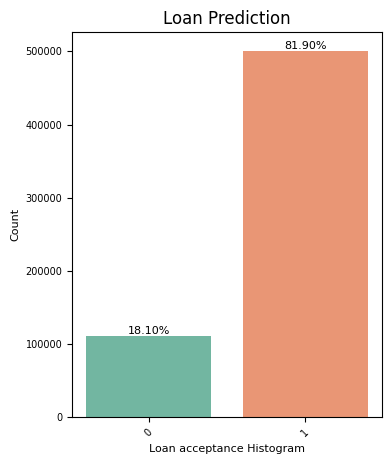

In [8]:
# target variable analysis
plt.figure(figsize=(4, 5))
sns.countplot(x="MIS_Status", data=df, palette='Set2', ax=plt.gca())
# data[target].value_counts().plot(kind='bar', title='Body Level')
# add percentages
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}%'.format(100*p.get_height()/len(df)),
                   fontsize=8, color='black', ha='center', va='bottom')
plt.xticks(rotation=45, fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Loan acceptance Histogram', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.title('Loan Prediction')
plt.axis('tight')
plt.savefig('../images/EDA/loan_distribution.png',
            dpi=300, bbox_inches='tight')
plt.show()


In [10]:
# features analysis
print(f"Features analysis")
X.iloc[:,:].hist(figsize=(100, 100), bins=50, xlabelsize=25, ylabelsize=25,)
plt.savefig(f'../images/EDA/features_distribution.png',dpi=300, bbox_inches='tight')
plt.show()    

Features analysis


total num_cols 22
to be printed 15


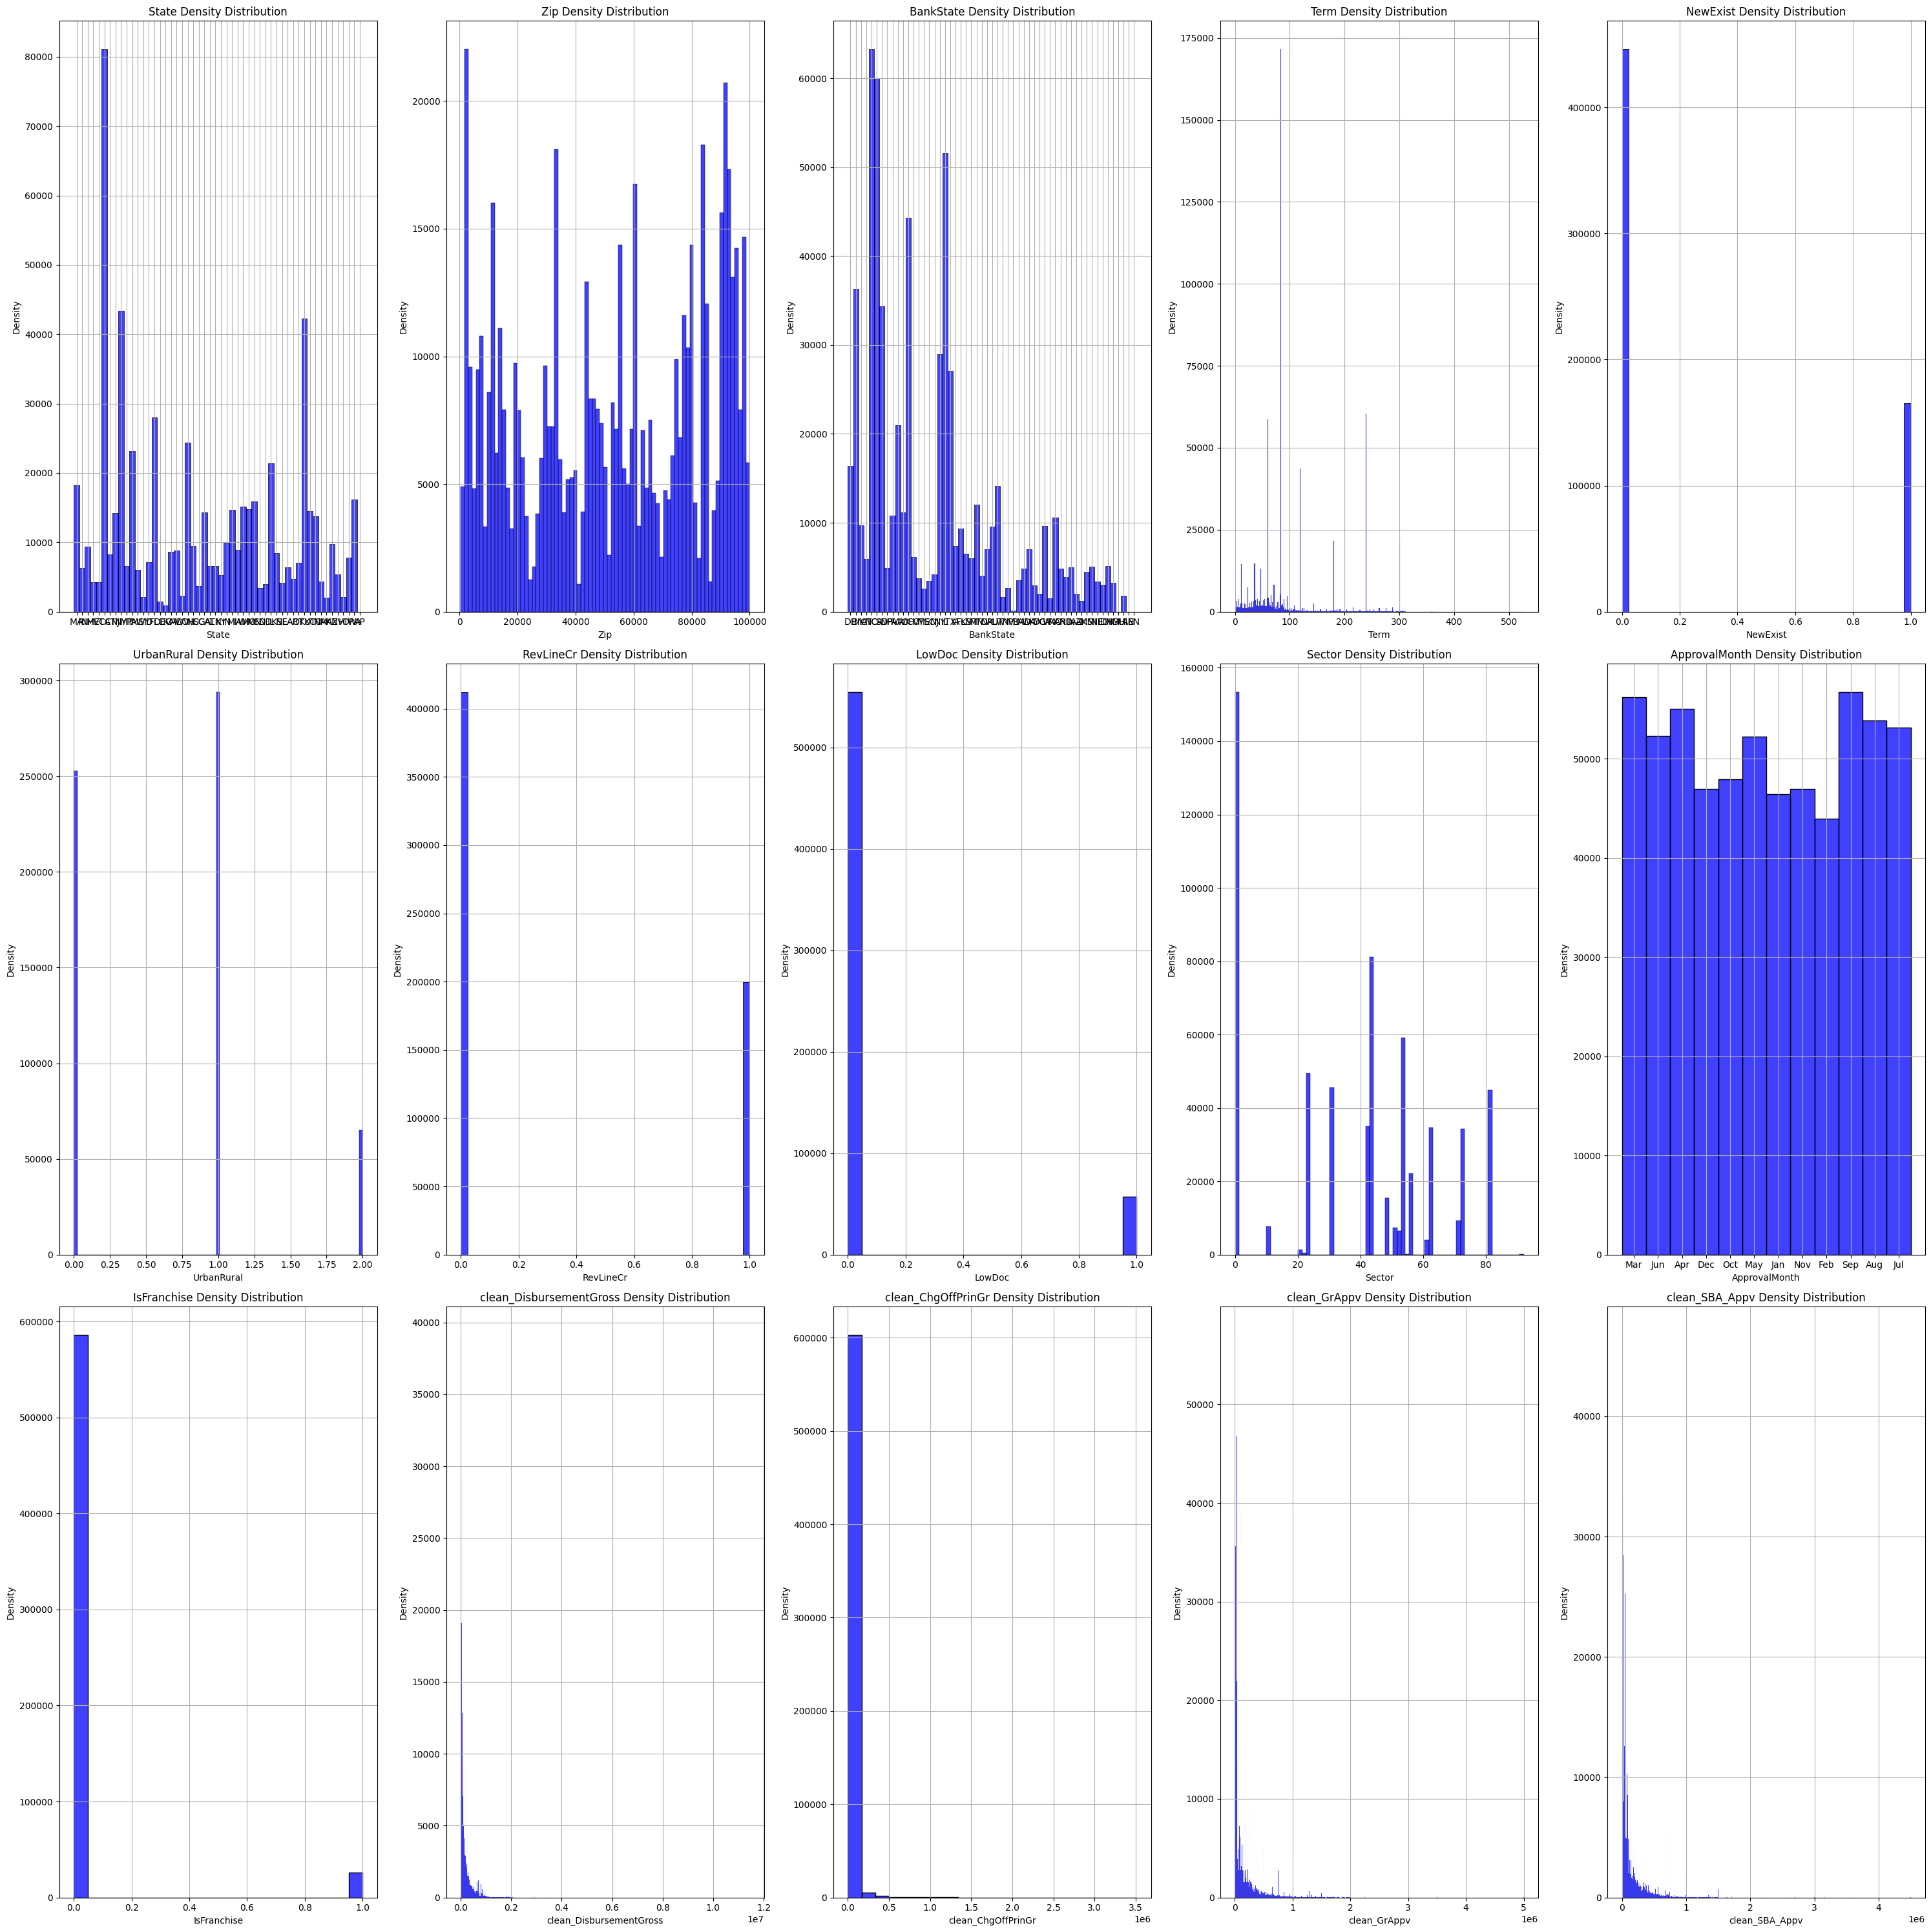

In [11]:
cols = list(df.columns)
num_cols = len(cols)
print("total num_cols",num_cols)
dont_print = ['Name','City','Bank','MIS_Status','CreateJob','RetainedJob','NoEmp']
# print list
print_list = [i for i in range(num_cols) if cols[i] not in dont_print]
n = len(print_list)
print("to be printed",n)    
plt.figure(figsize=(30, 30))
n_rows = 3
n_cols = 5
for k in range(1, n_rows * n_cols + 1):
    # Create a subplot at the k-th position in the grid
    plt.subplot(n_rows, n_cols, k)
    # column index in df
    col_index = cols.index(cols[print_list[k-1]])
    sns.histplot(df.iloc[:, col_index], color = 'blue')
    # Set title for the subplot
    plt.title(f'{cols[print_list[k-1]]} Density Distribution')
    plt.xlabel(cols[print_list[k-1]])
    plt.ylabel('Density')
    # grid
    plt.grid()
# Adjust layout to prevent overlapping
plt.tight_layout()

plt.savefig(f'../images/EDA/features_density_distribution.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [7]:
to_print_features = []
# unique values of each columns
for i,col in enumerate(X.columns):
    unique_vals = df[col].unique()
    if len(unique_vals) <= 1000:
        print(f"\nThere are {len(unique_vals)} unique values in column '{col}'")
        to_print_features.append(col)


There are 52 unique values in column 'State'

There are 55 unique values in column 'BankState'

There are 406 unique values in column 'Term'

There are 529 unique values in column 'NoEmp'

There are 2 unique values in column 'NewExist'

There are 222 unique values in column 'CreateJob'

There are 315 unique values in column 'RetainedJob'

There are 3 unique values in column 'UrbanRural'

There are 2 unique values in column 'RevLineCr'

There are 2 unique values in column 'LowDoc'

There are 21 unique values in column 'Sector'

There are 12 unique values in column 'ApprovalMonth'

There are 2 unique values in column 'IsFranchise'


In [8]:
n = len(to_print_features)
print("to be printed",n)  

to be printed 13


In [9]:
to_print_features

['State',
 'BankState',
 'Term',
 'NoEmp',
 'NewExist',
 'CreateJob',
 'RetainedJob',
 'UrbanRural',
 'RevLineCr',
 'LowDoc',
 'Sector',
 'ApprovalMonth',
 'IsFranchise']

In [14]:
for i in range(3):
    plt.figure(figsize=(100, 100))
    n_rows = 4
    n_cols = 1
    for k in range(1, n_rows * n_cols + 1):
        print("index:",(k + i*n_rows*n_cols)-1)
        print("Feature: ",to_print_features[(k + i*n_rows*n_cols)-1])
        # Create a subplot at the k-th position in the grid
        plt.subplot(n_rows, n_cols, k)
        # the effect of features on the acceptance of the loan
        sns.countplot(x=X[to_print_features[(k + i*n_rows*n_cols)-1]], hue=y, palette='Set2')
        plt.title("Analyzing accepting the loan according to the duriation of the loan",fontsize=20)
        # add x label with 18 font size
        plt.xlabel(to_print_features[(k + i*n_rows*n_cols)-1], fontsize=20)
        plt.ylabel("Loans Count",fontsize=20)
        plt.legend(["Not Accepted", "Accepted"])
        plt.xticks(rotation=0)
    # Adjust layout to prevent overlapping
    plt.tight_layout()

    plt.savefig(f'../images/EDA/features_acceptance_{i+1}.png', dpi=300, bbox_inches='tight')
    # Show the plot
    plt.show()

index: 0
Feature:  State
index: 1
Feature:  BankState
index: 2
Feature:  Term
index: 3
Feature:  NoEmp


index: 4
Feature:  NewExist
index: 5
Feature:  CreateJob
index: 6
Feature:  RetainedJob
index: 7
Feature:  UrbanRural


index: 8
Feature:  RevLineCr
index: 9
Feature:  LowDoc
index: 10
Feature:  Sector
index: 11
Feature:  ApprovalMonth


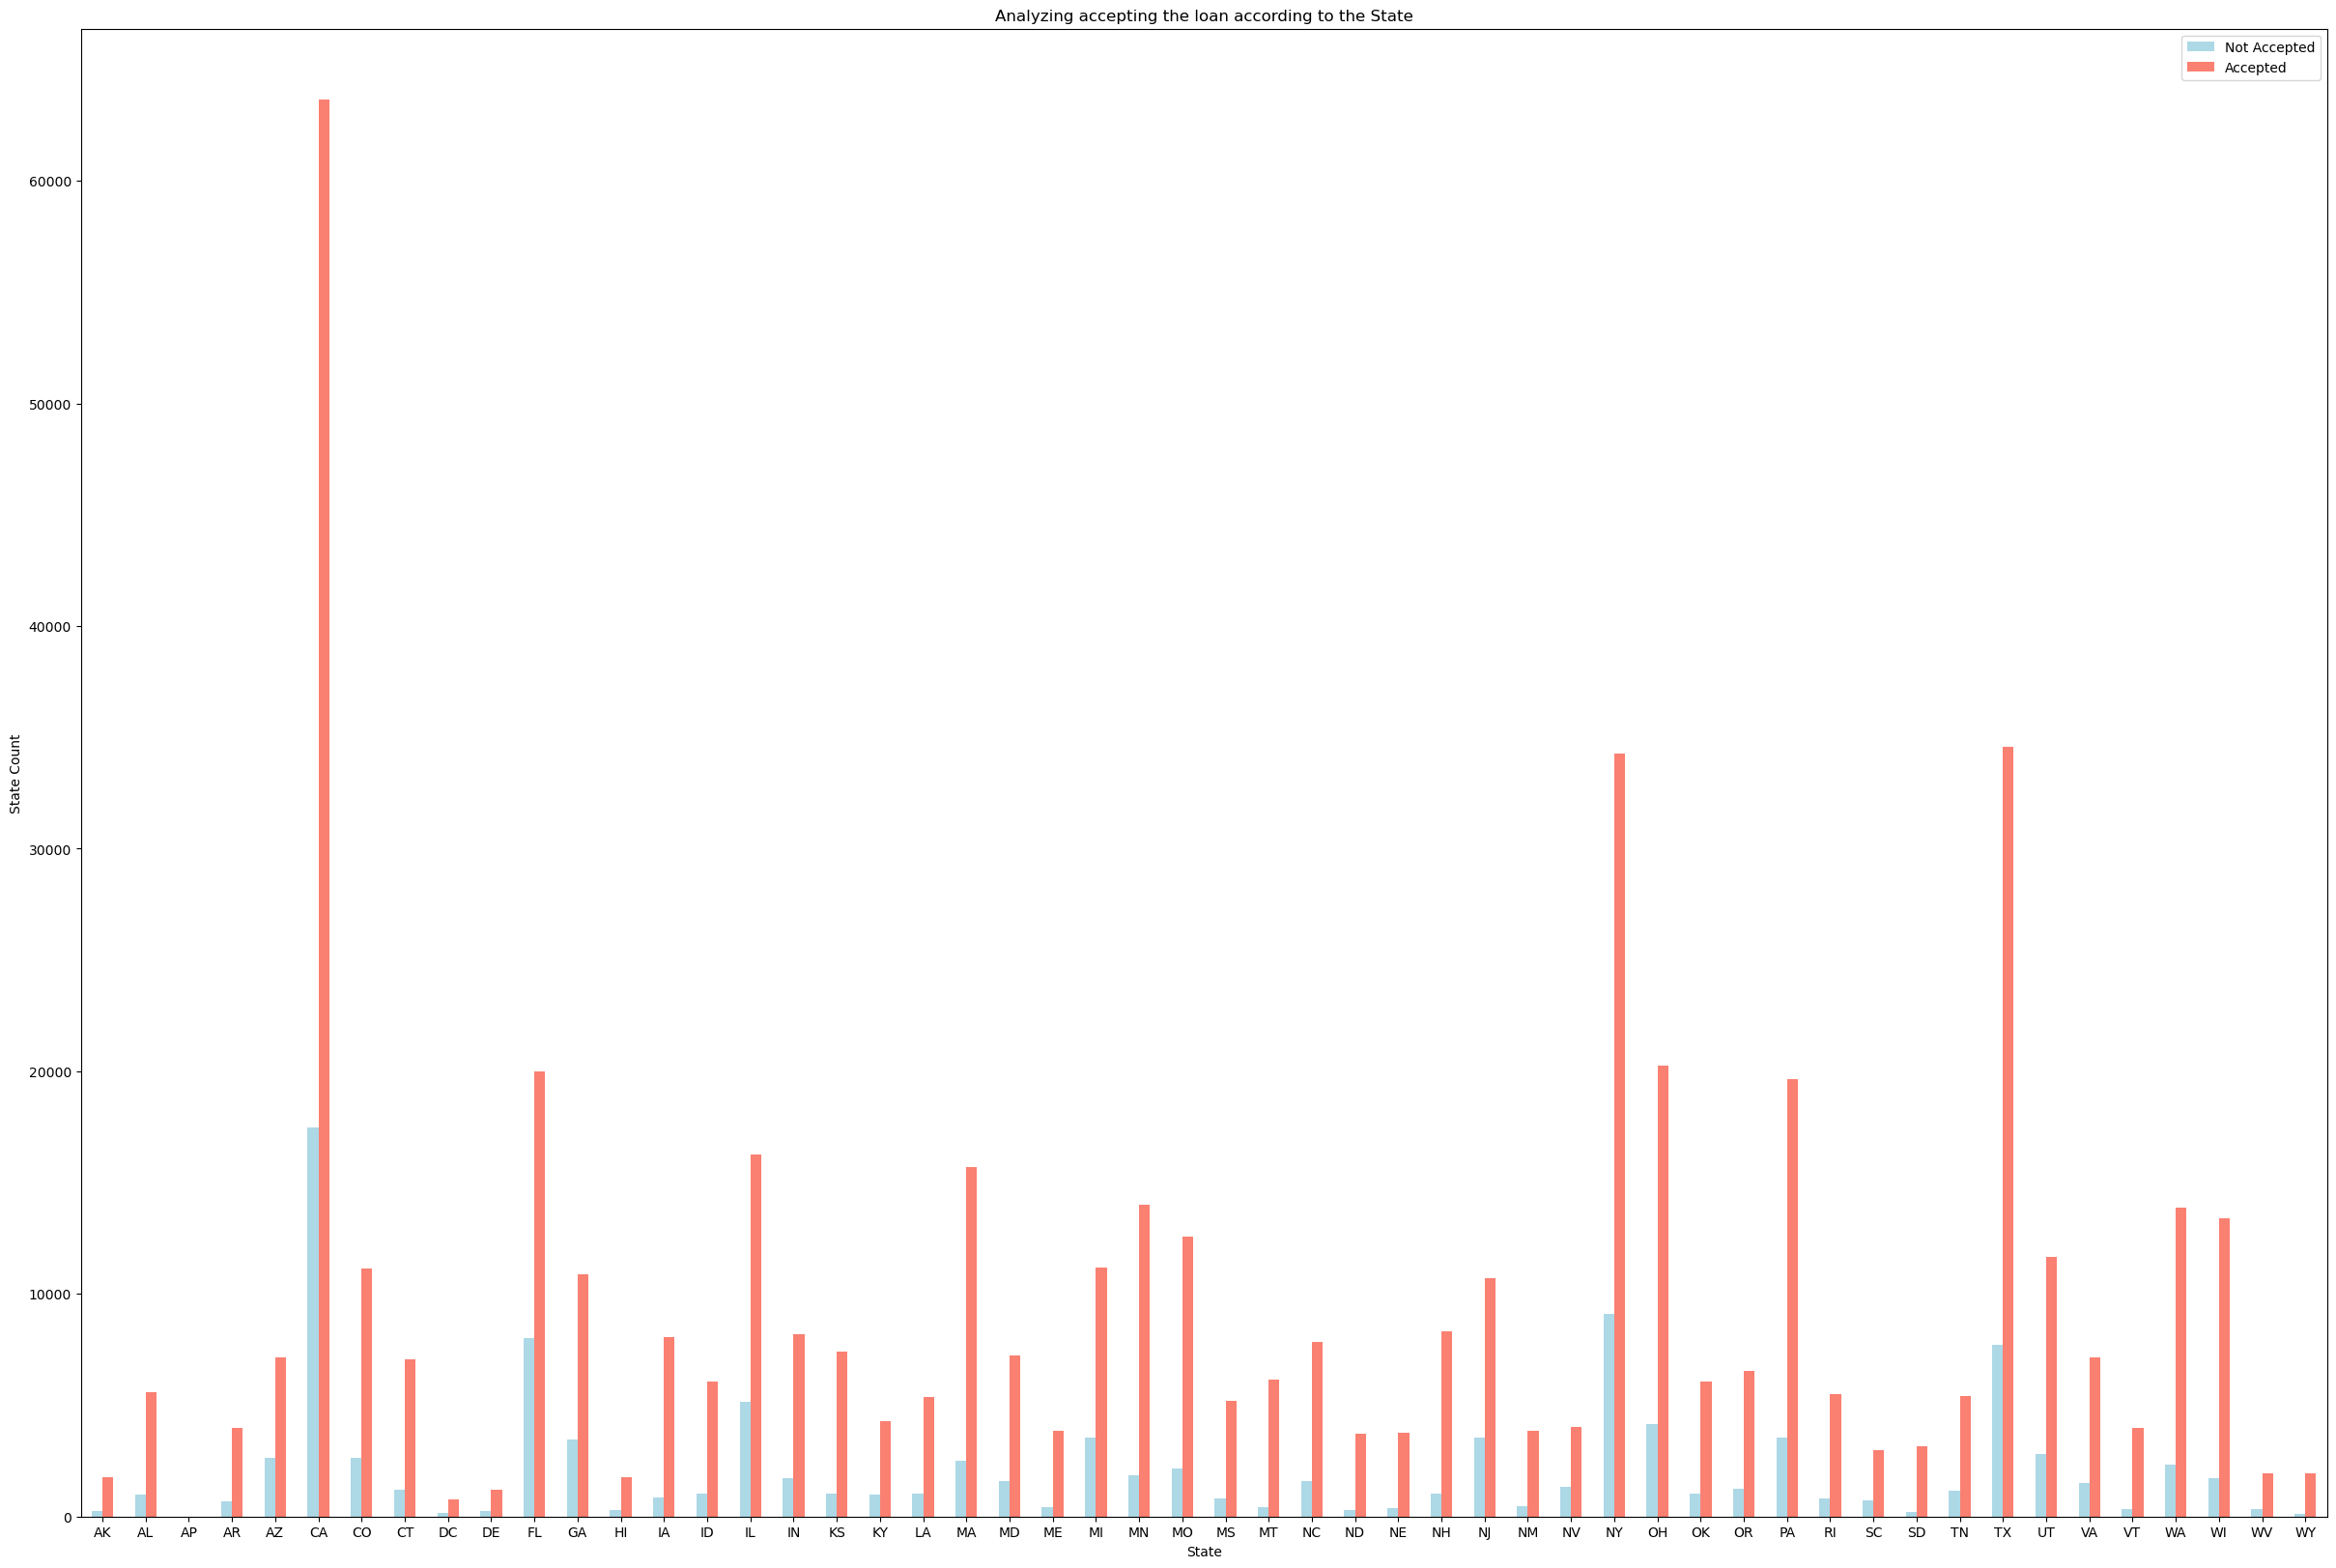

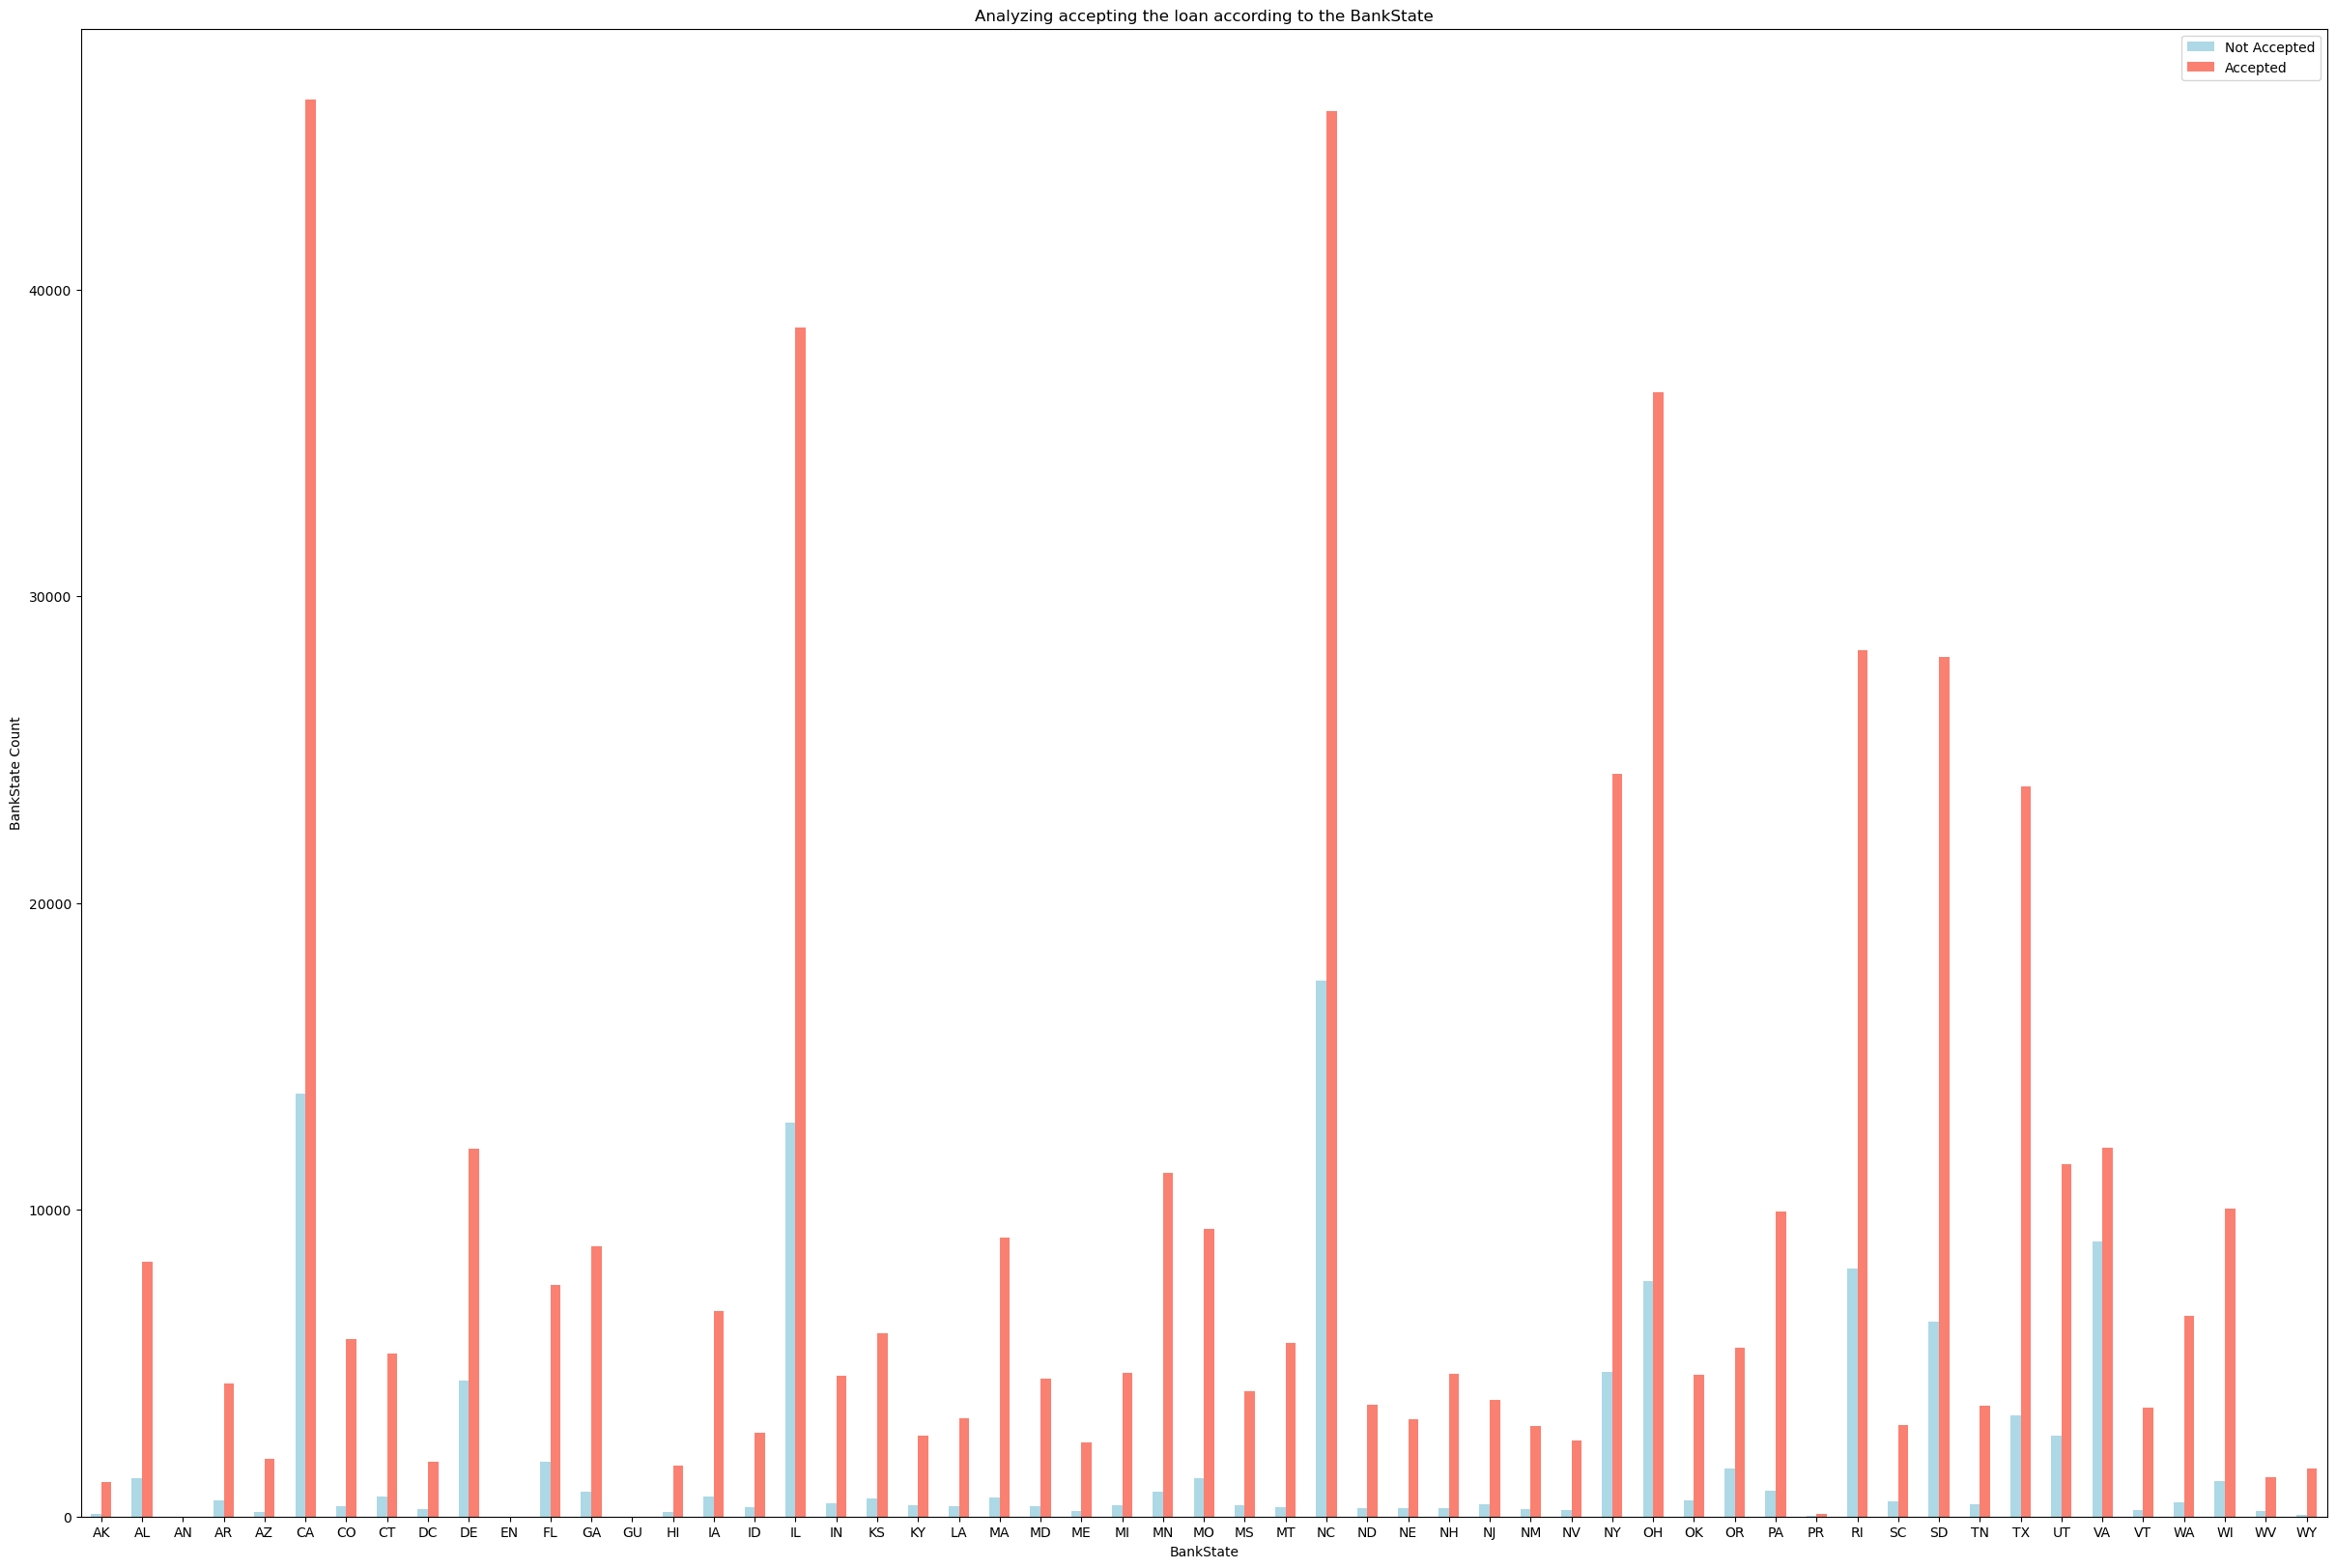

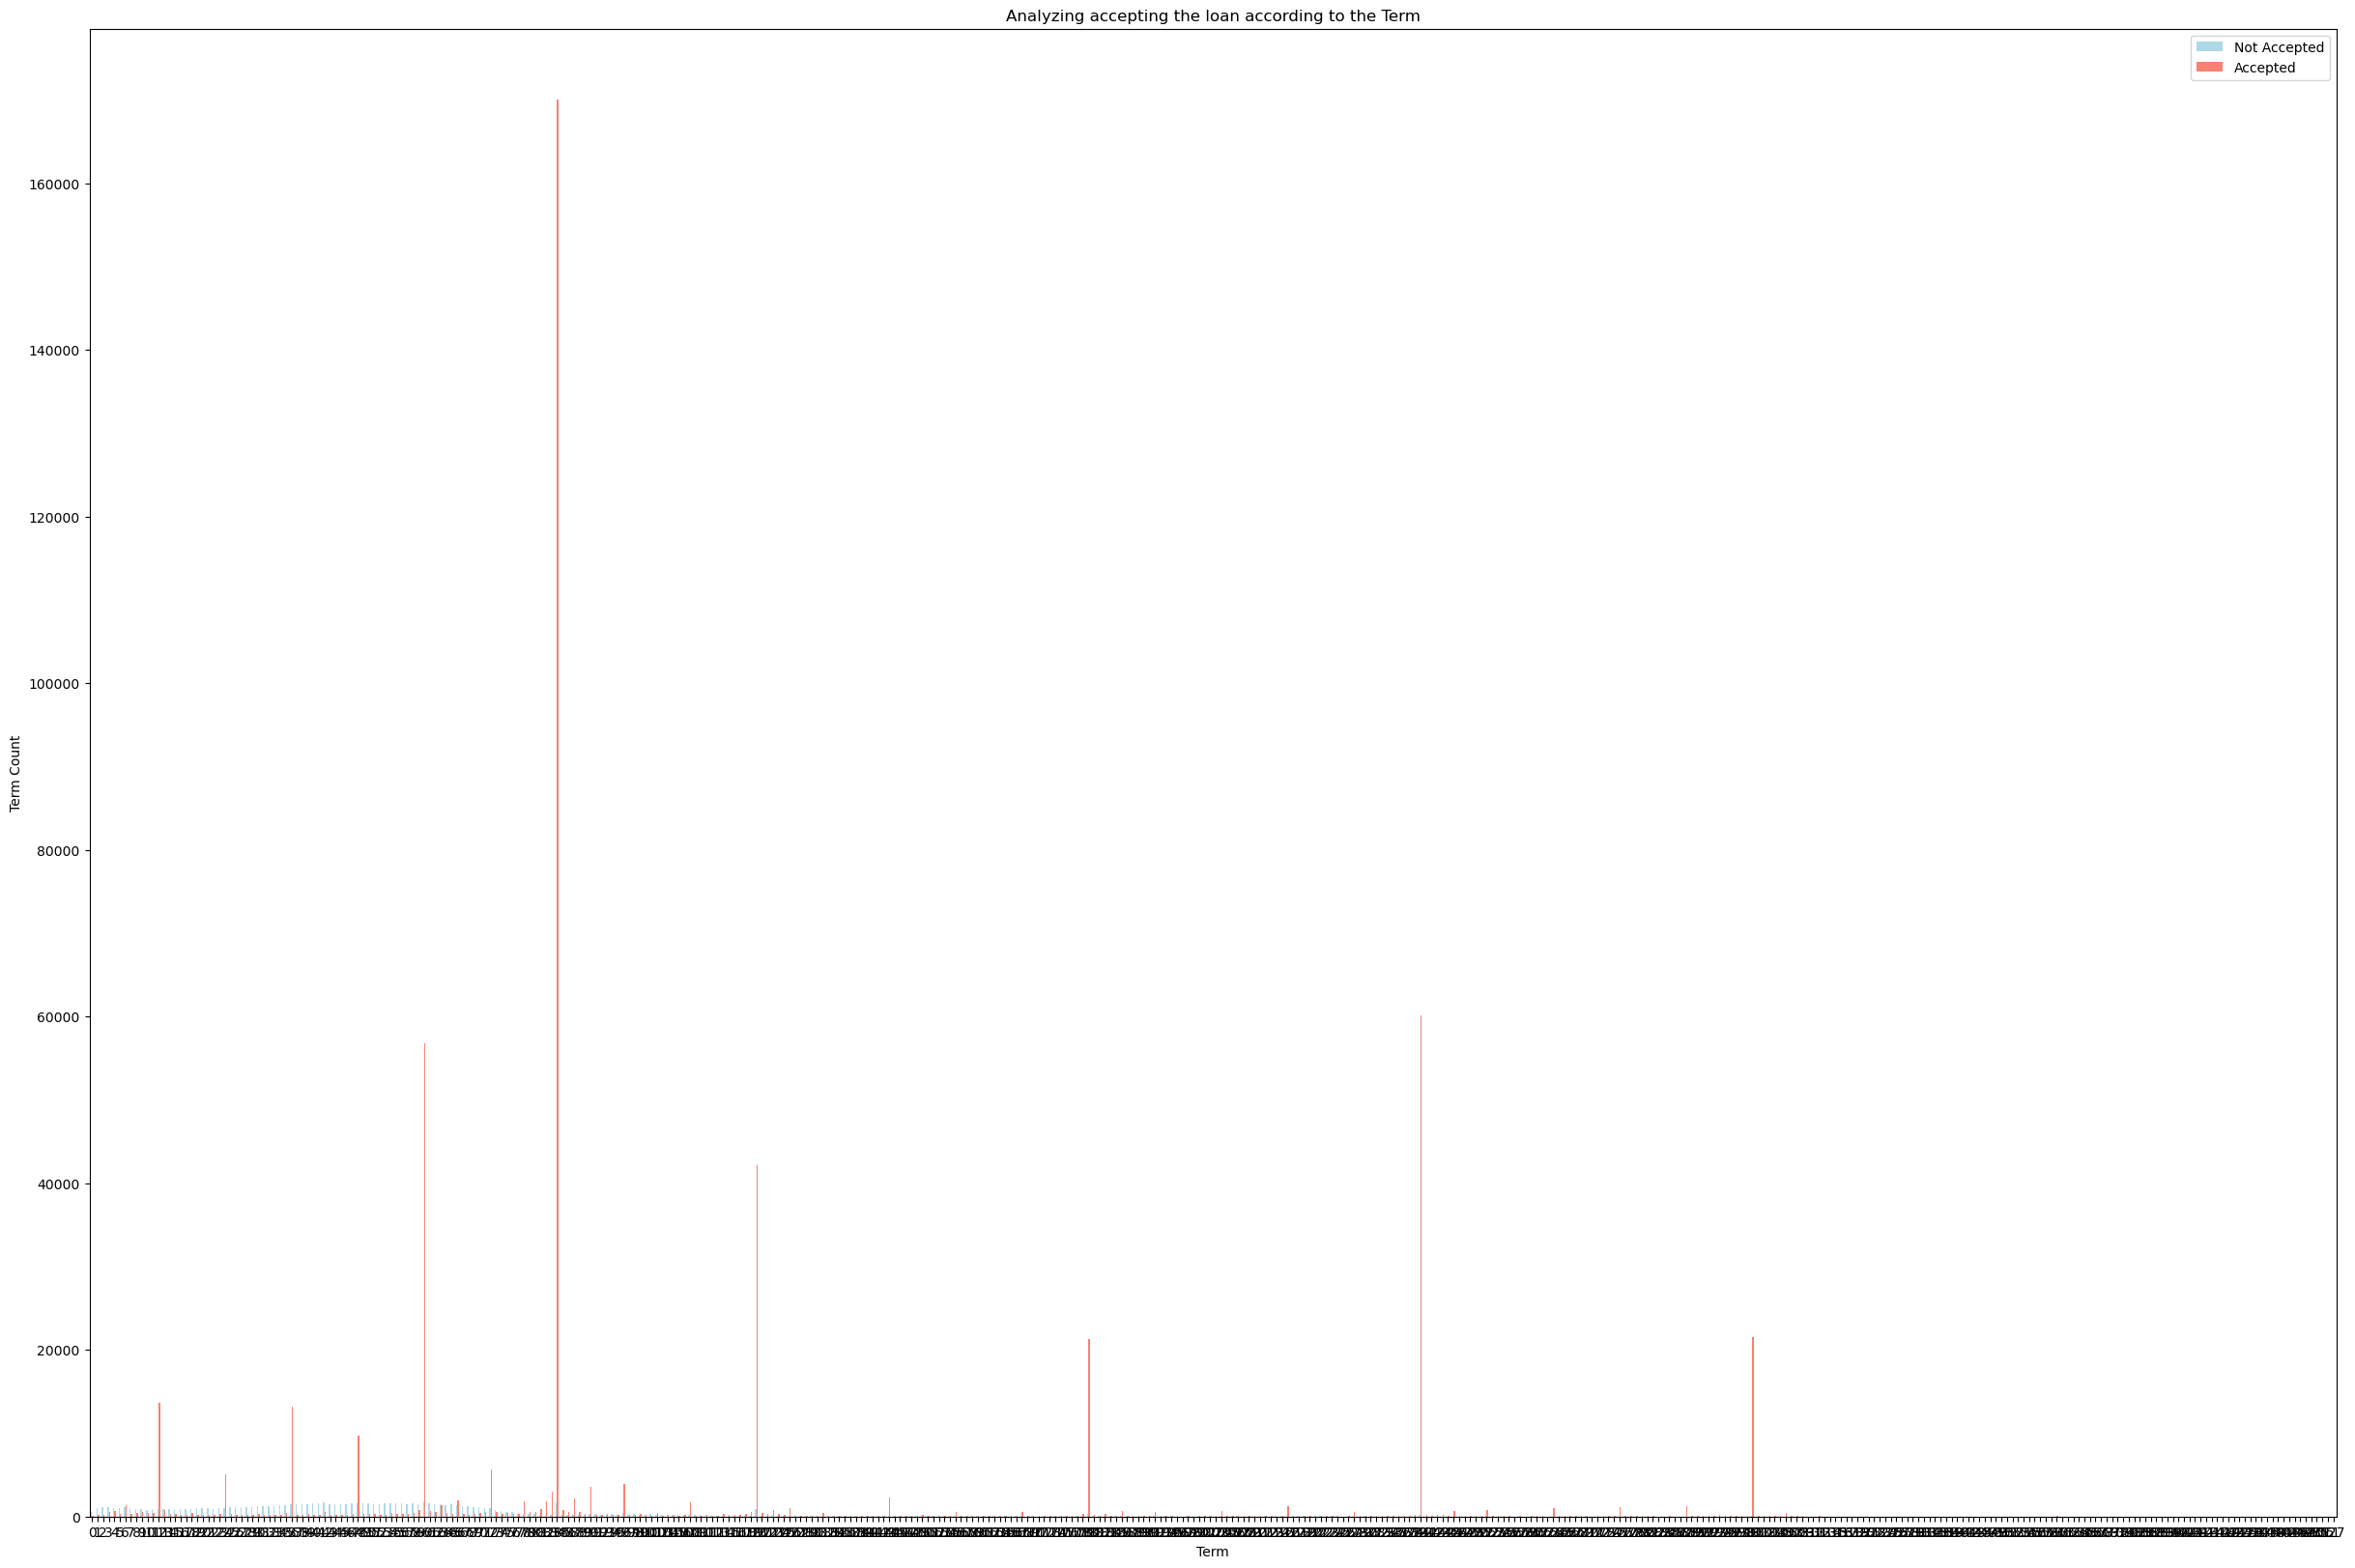

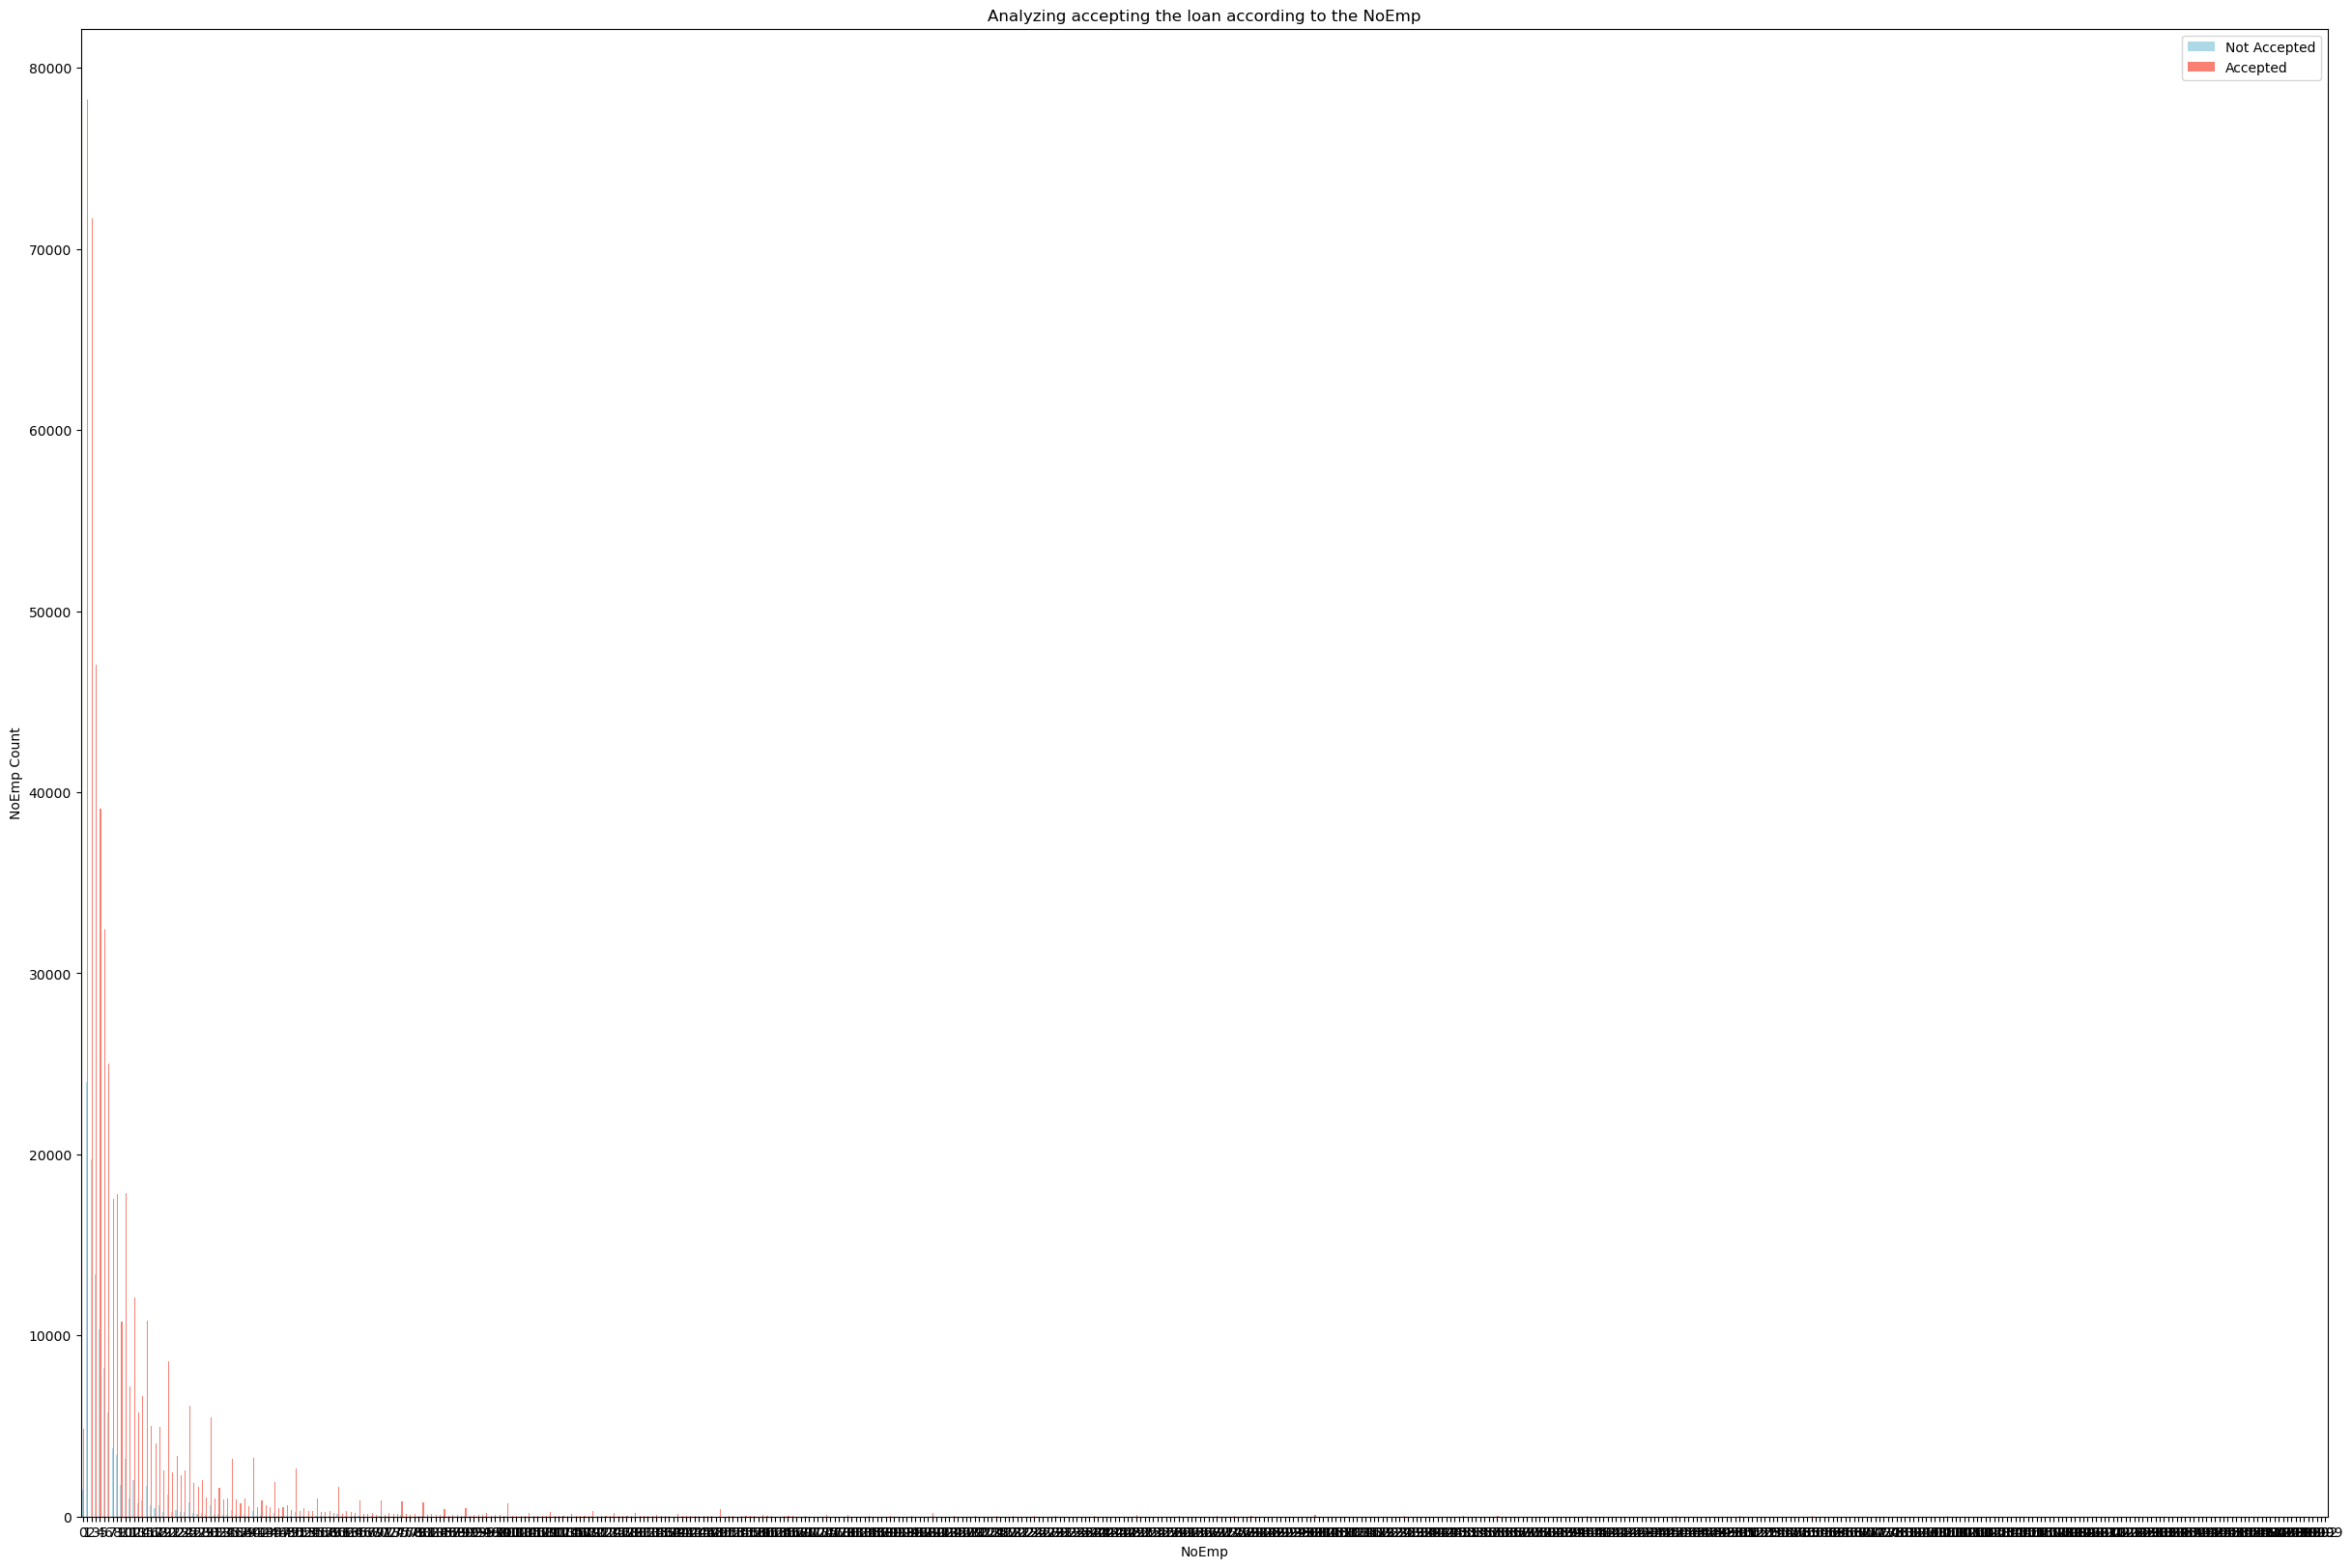

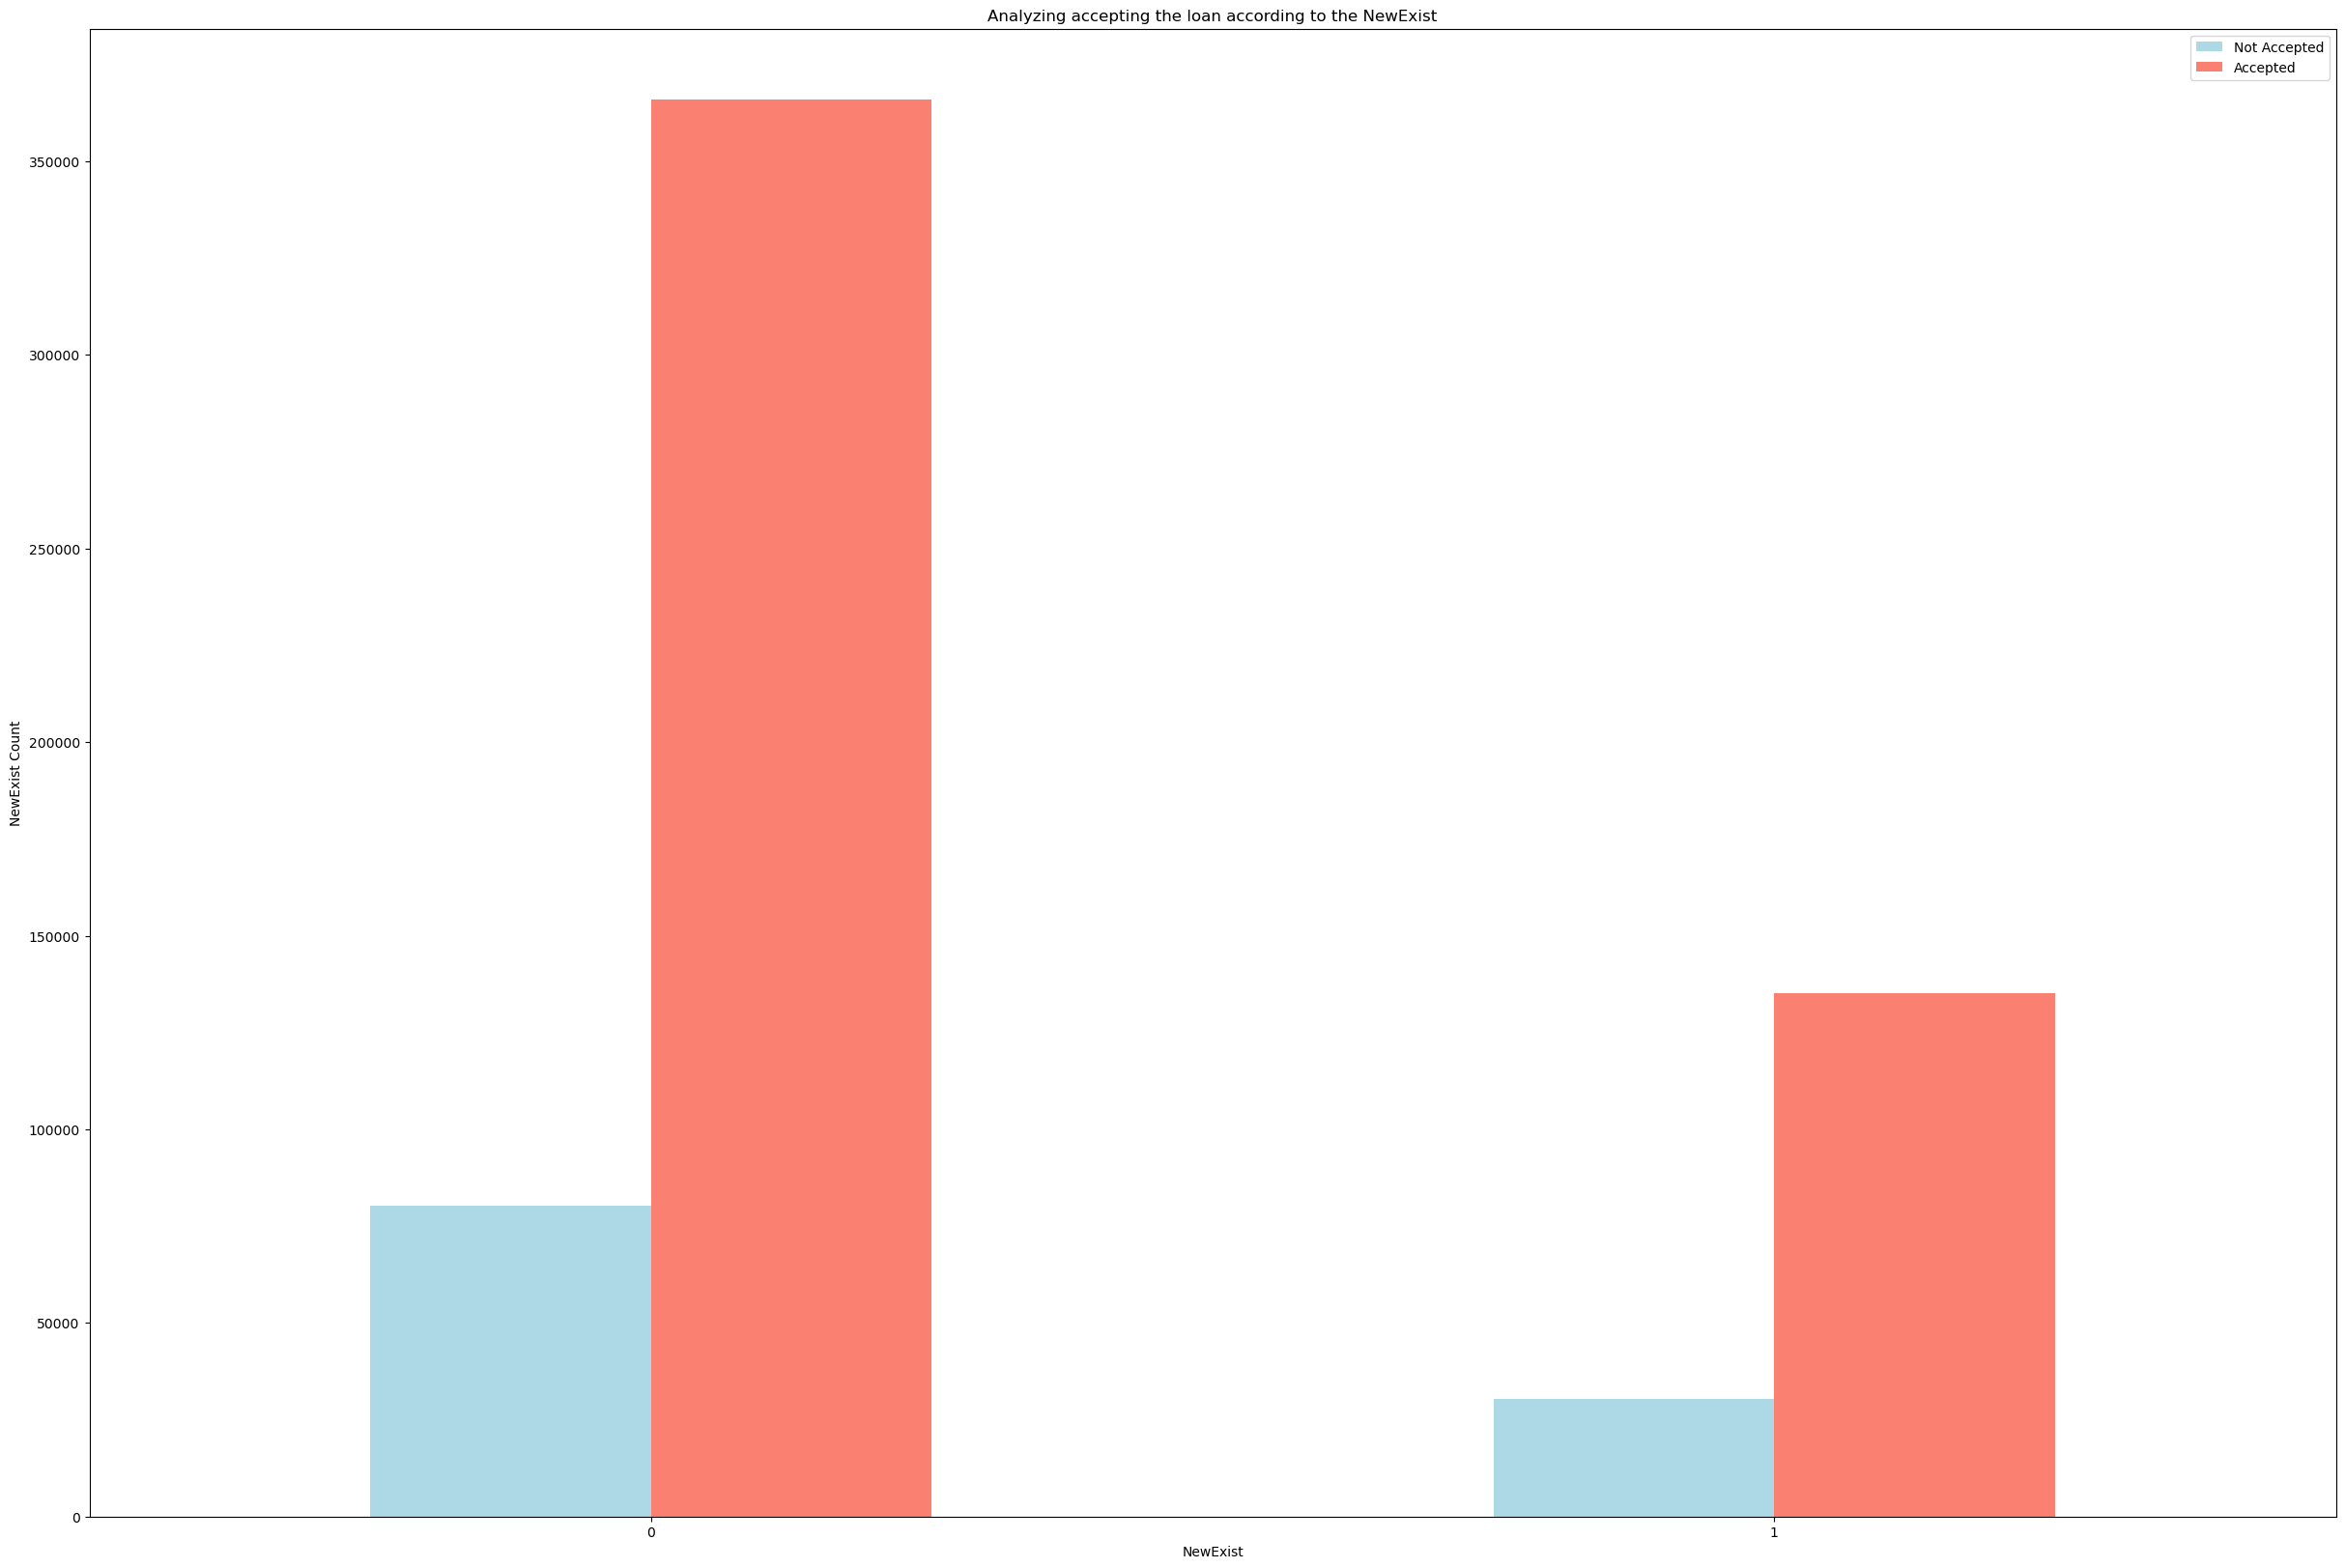

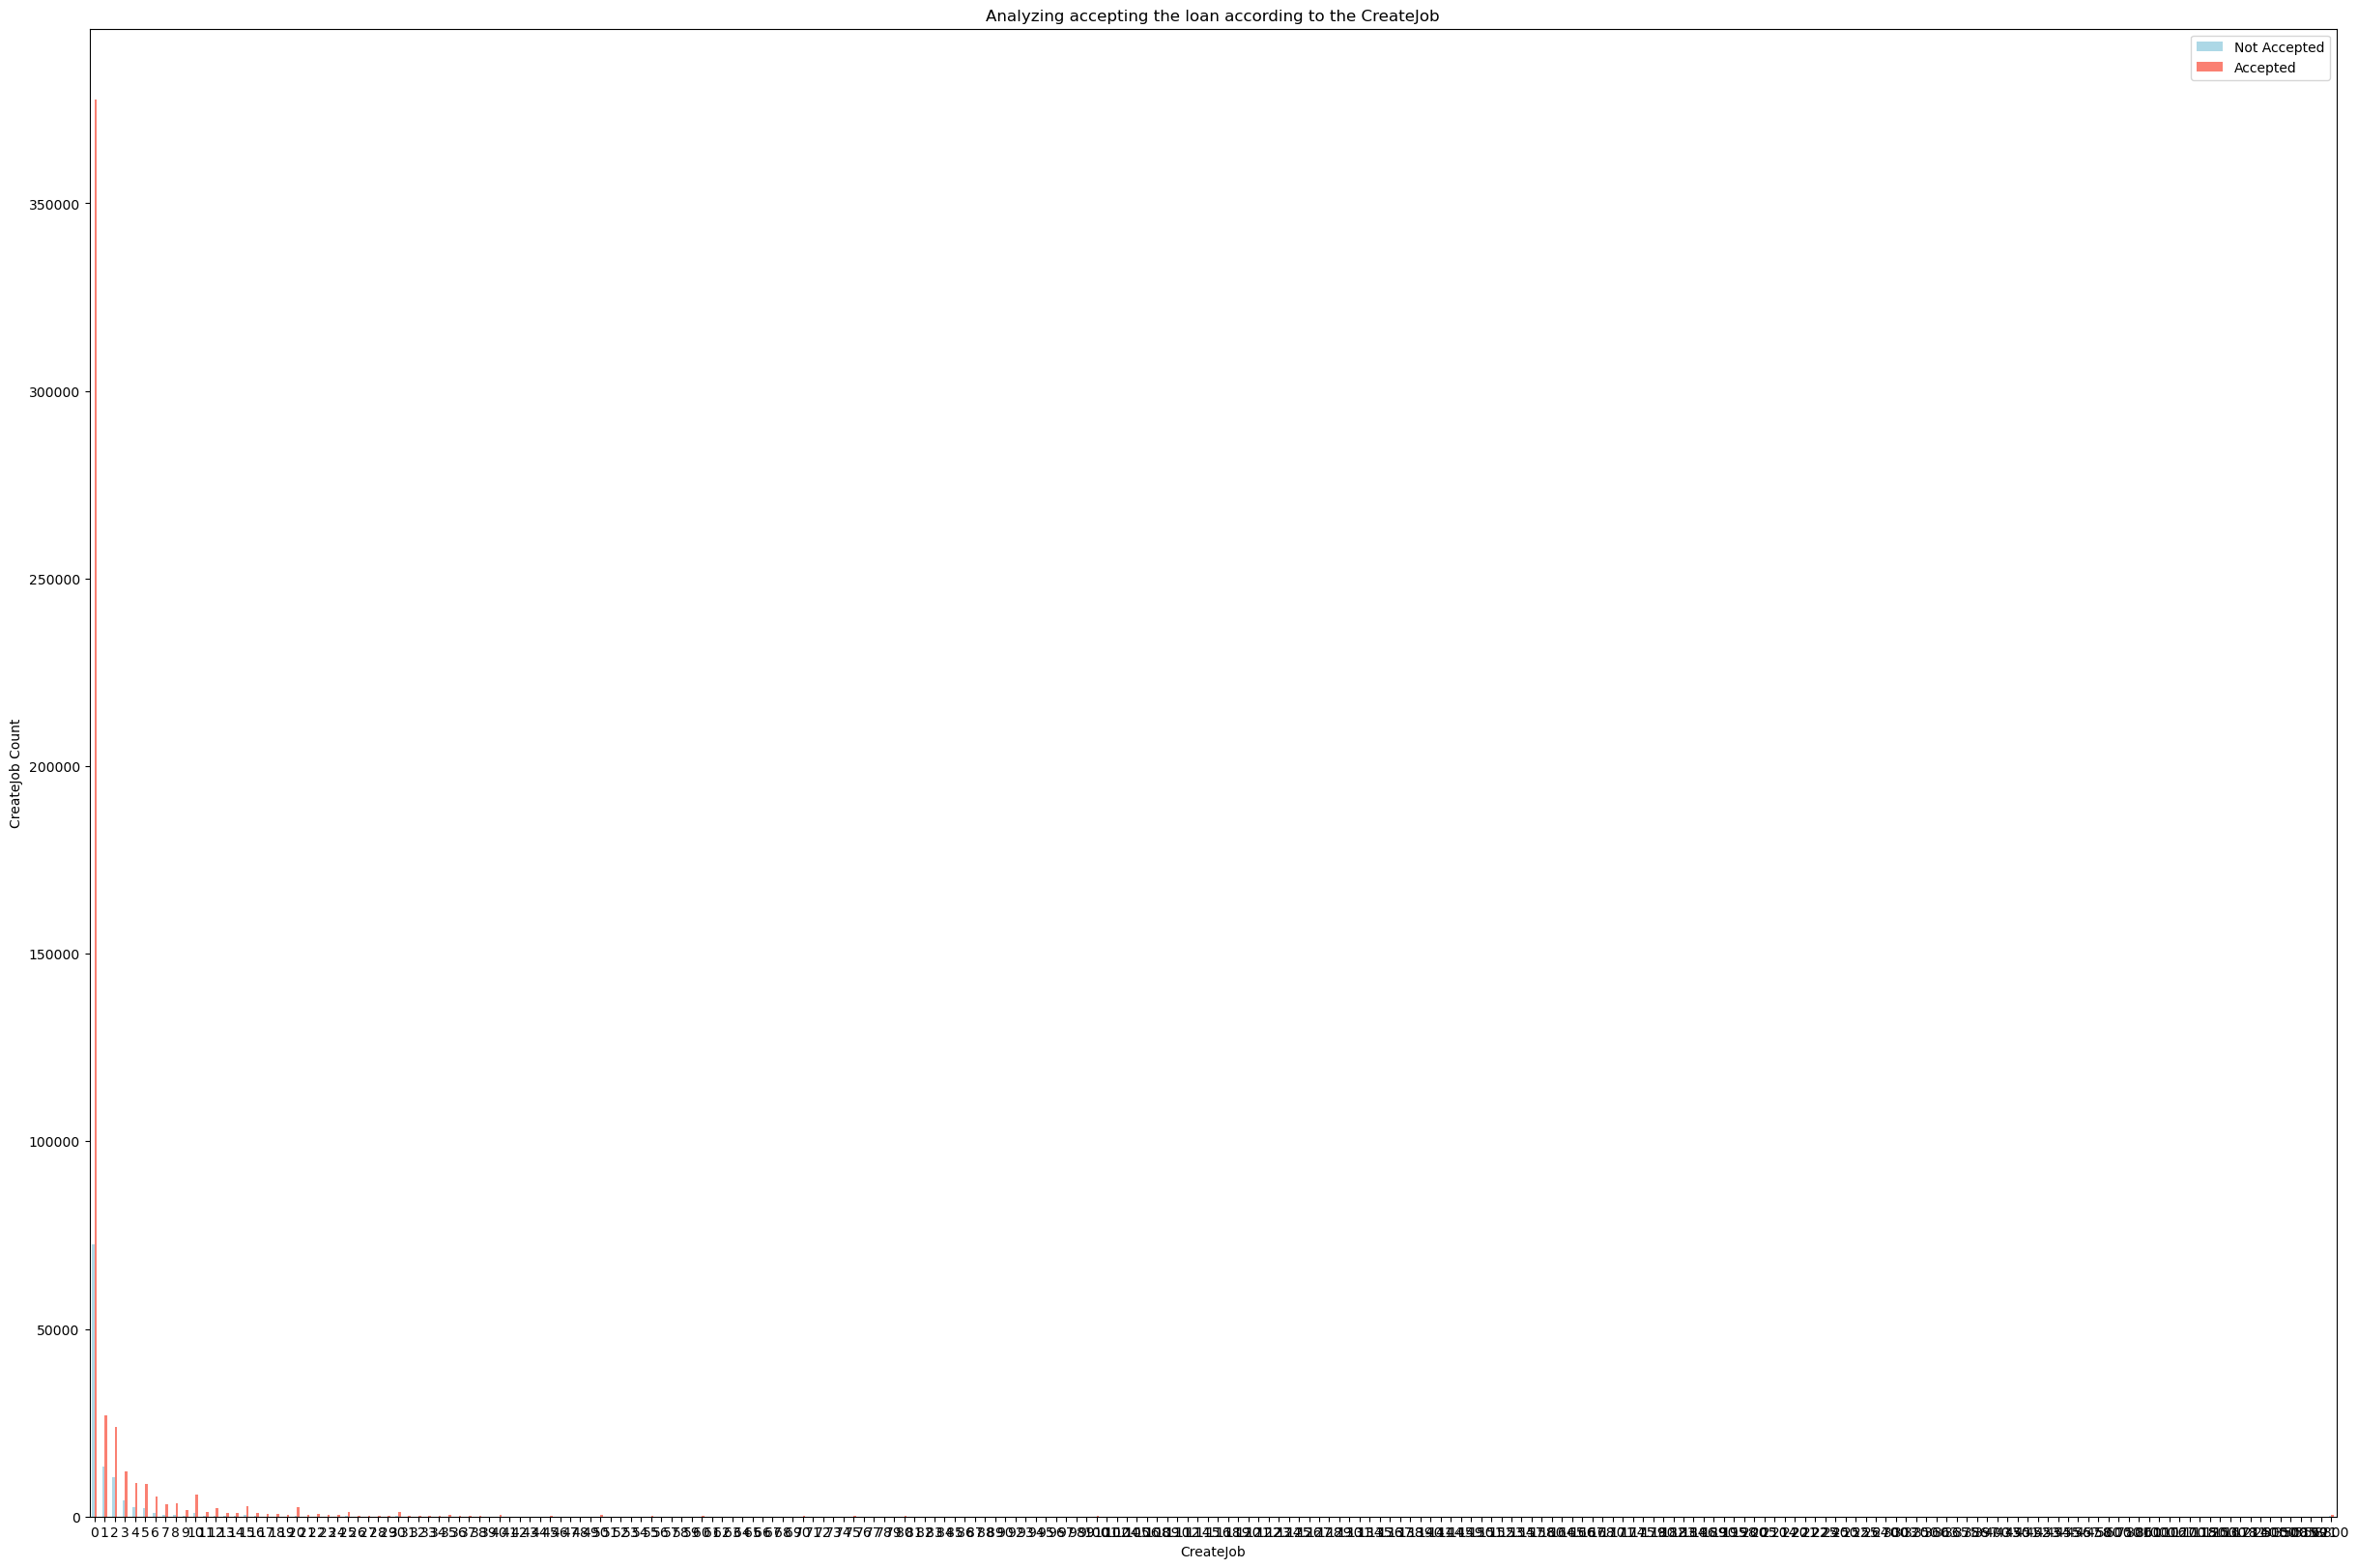

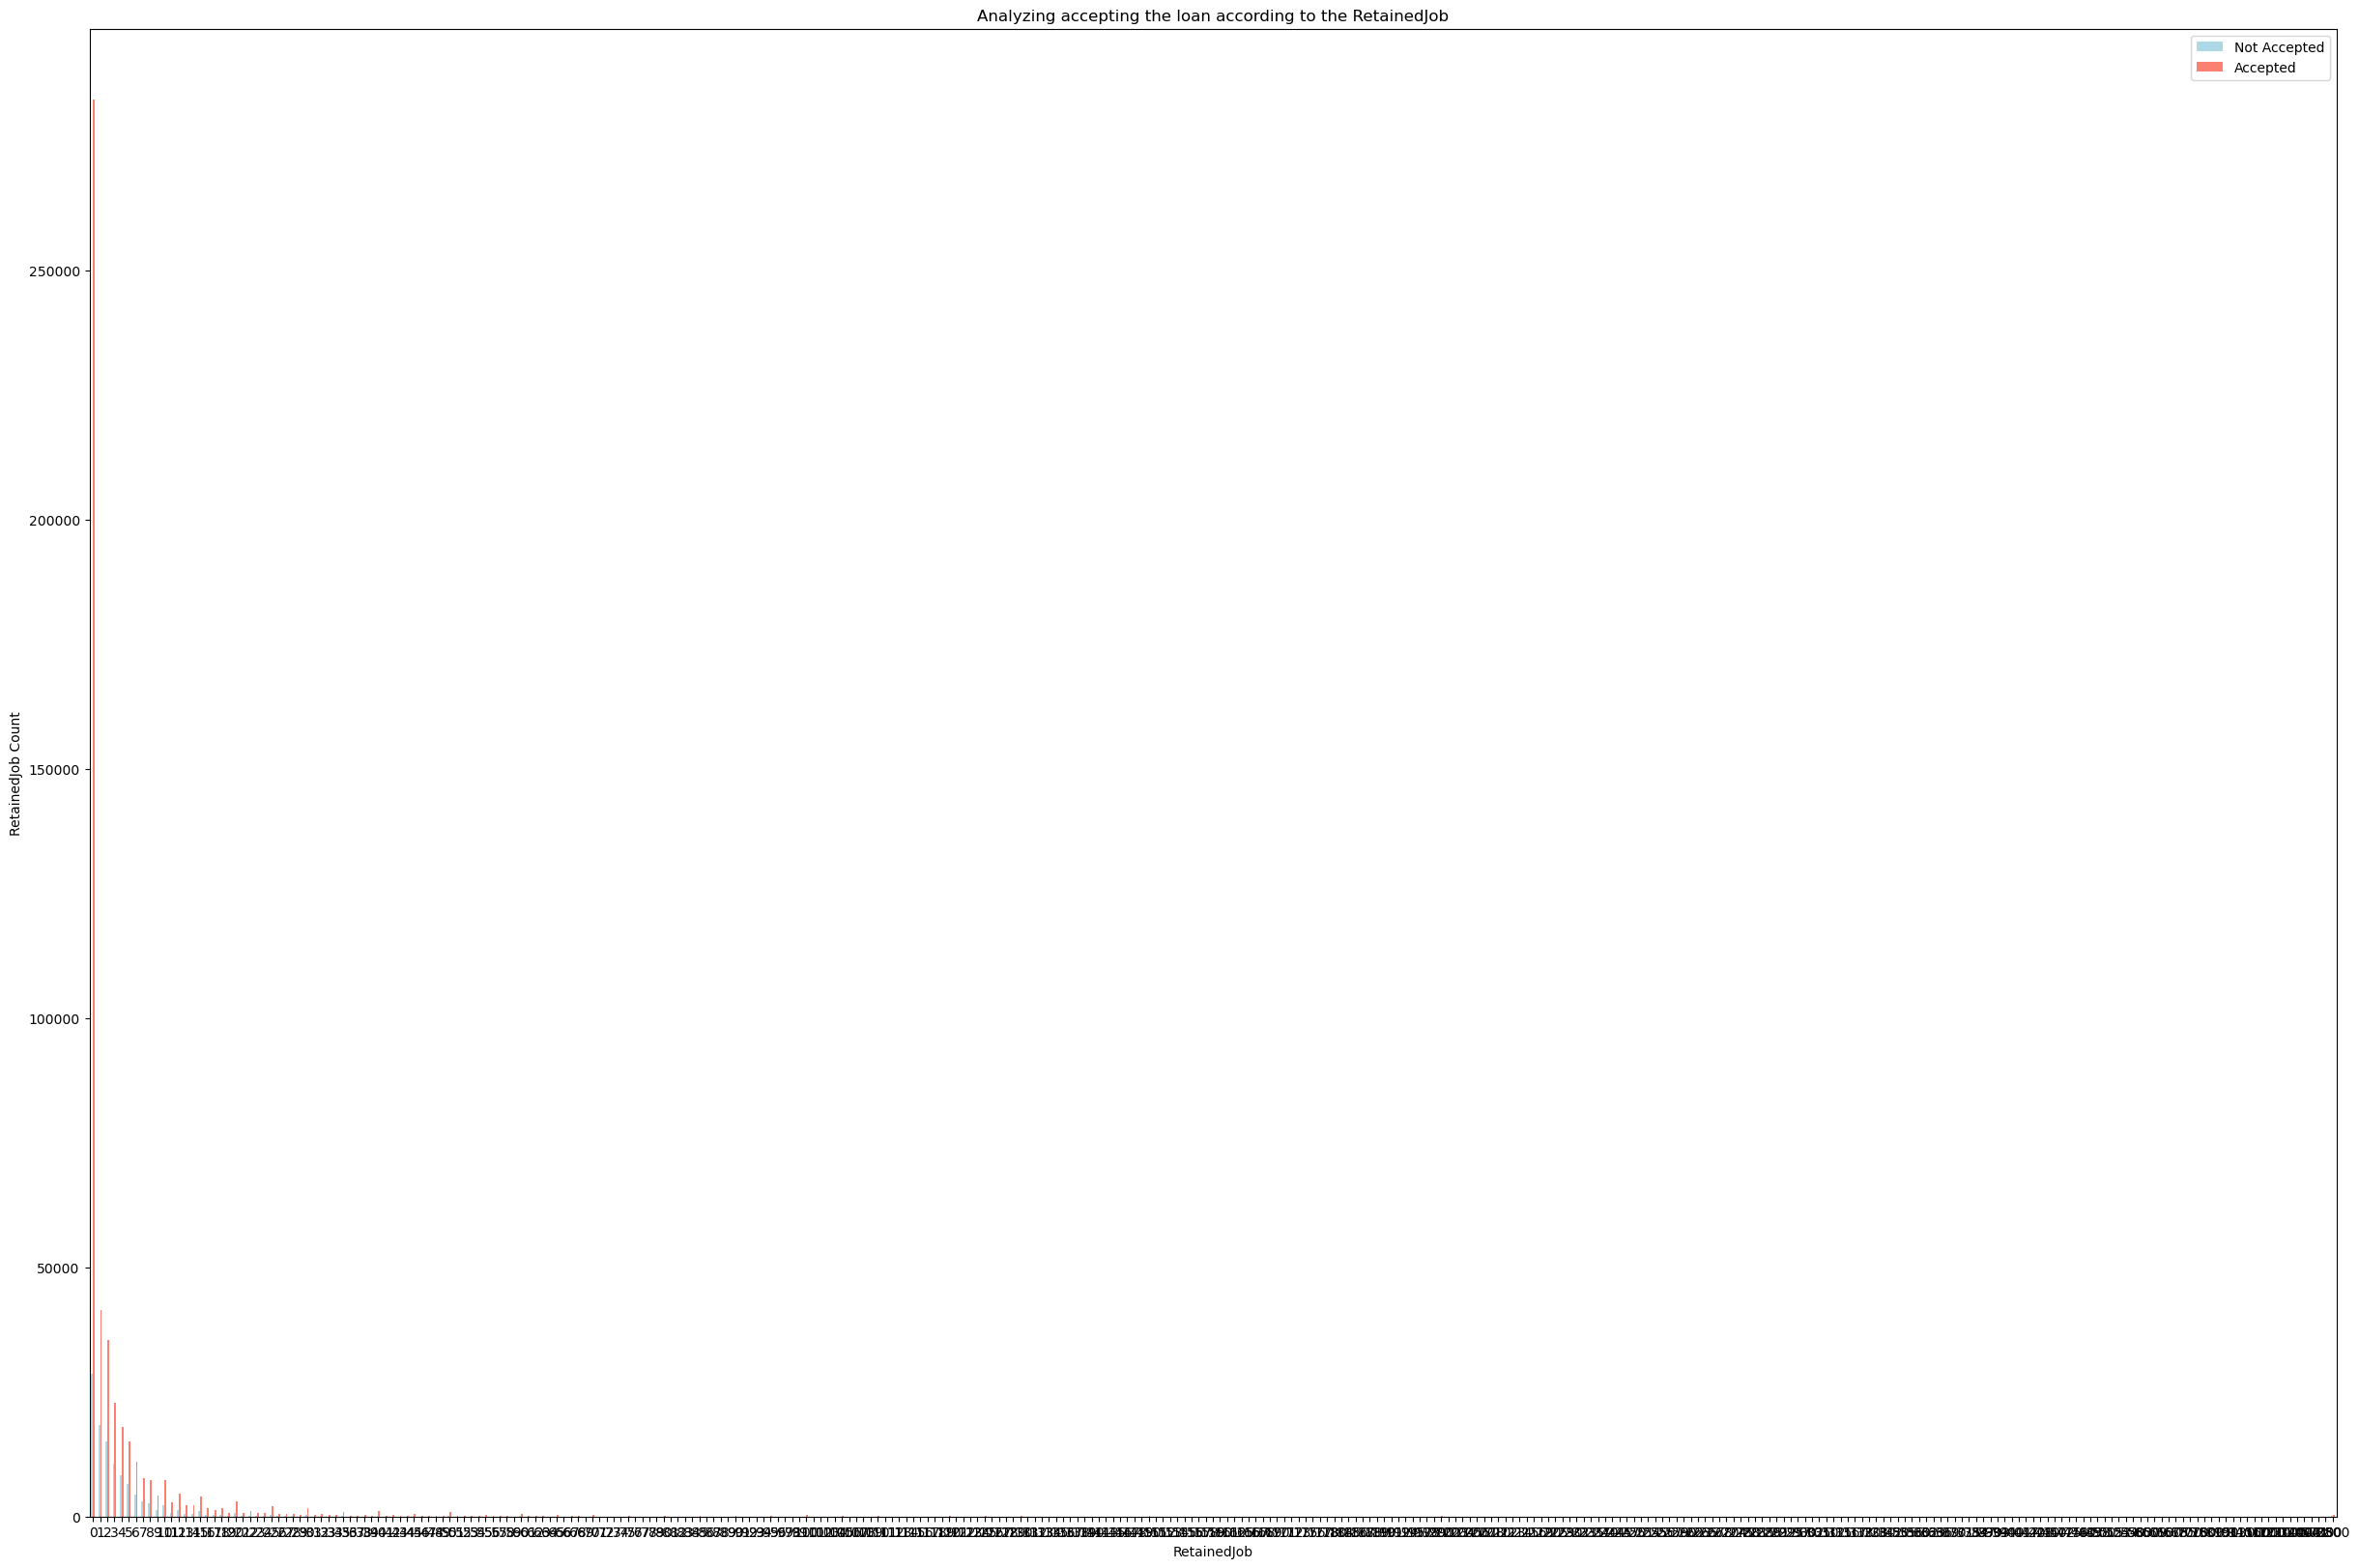

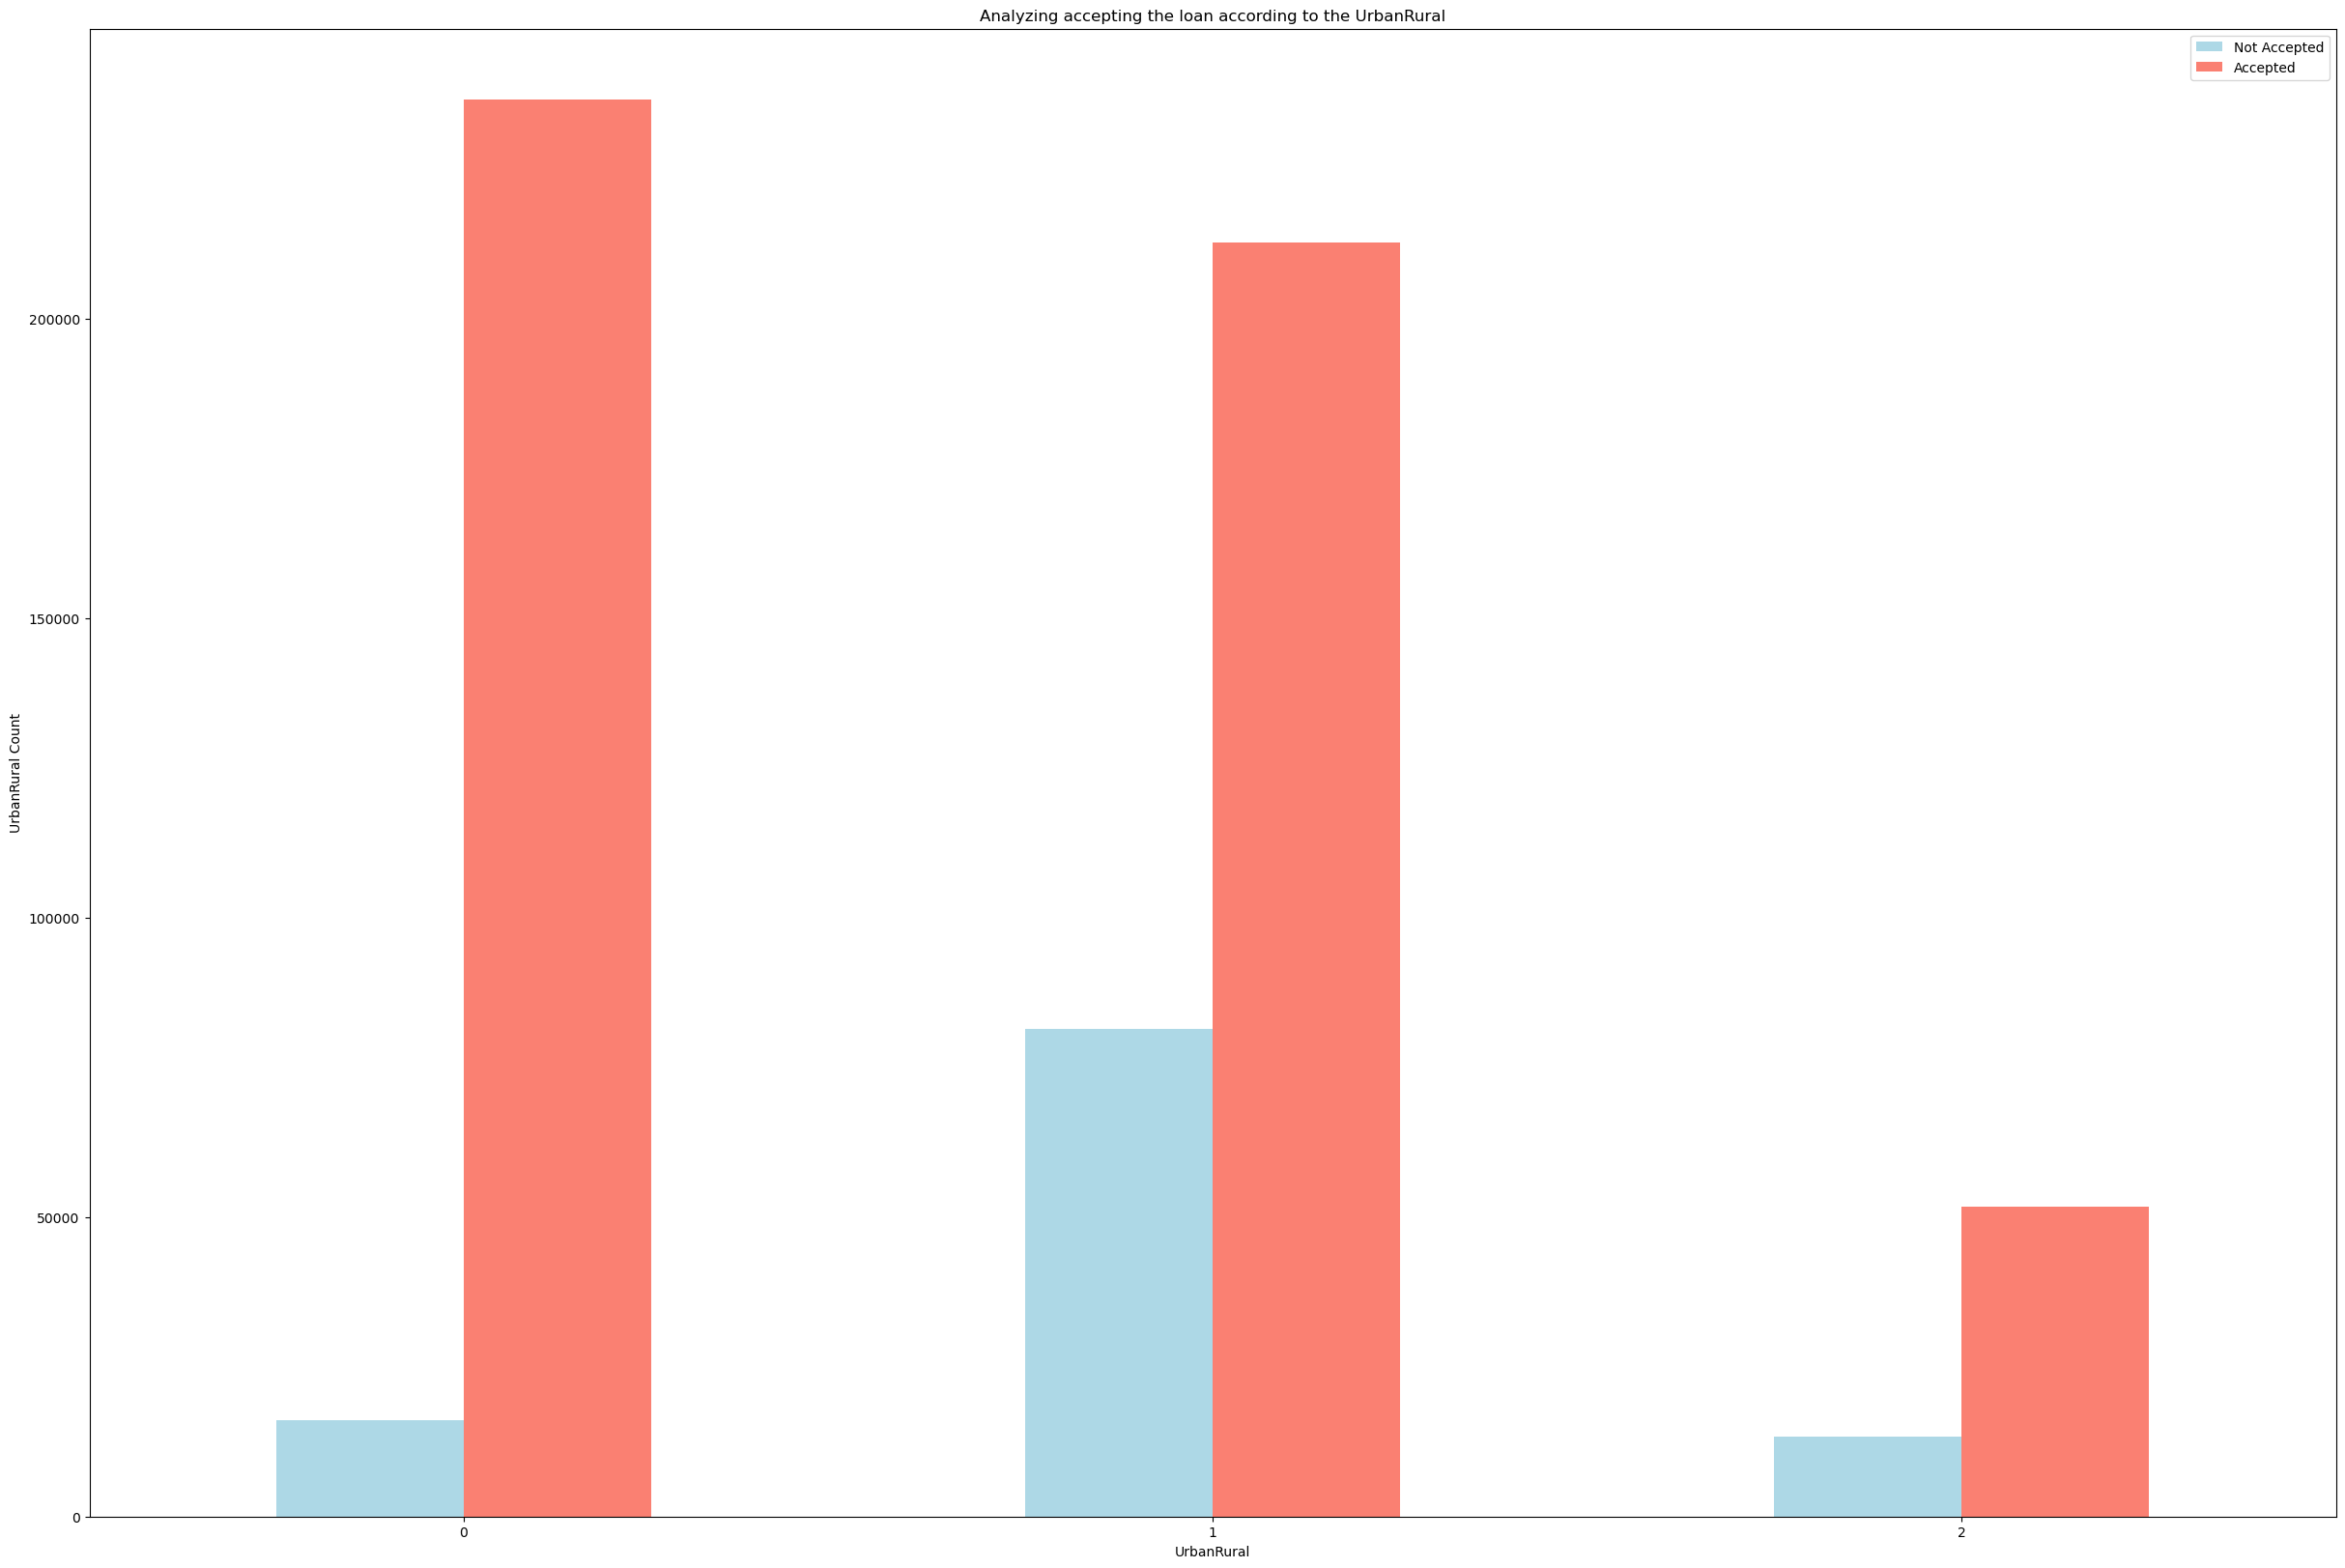

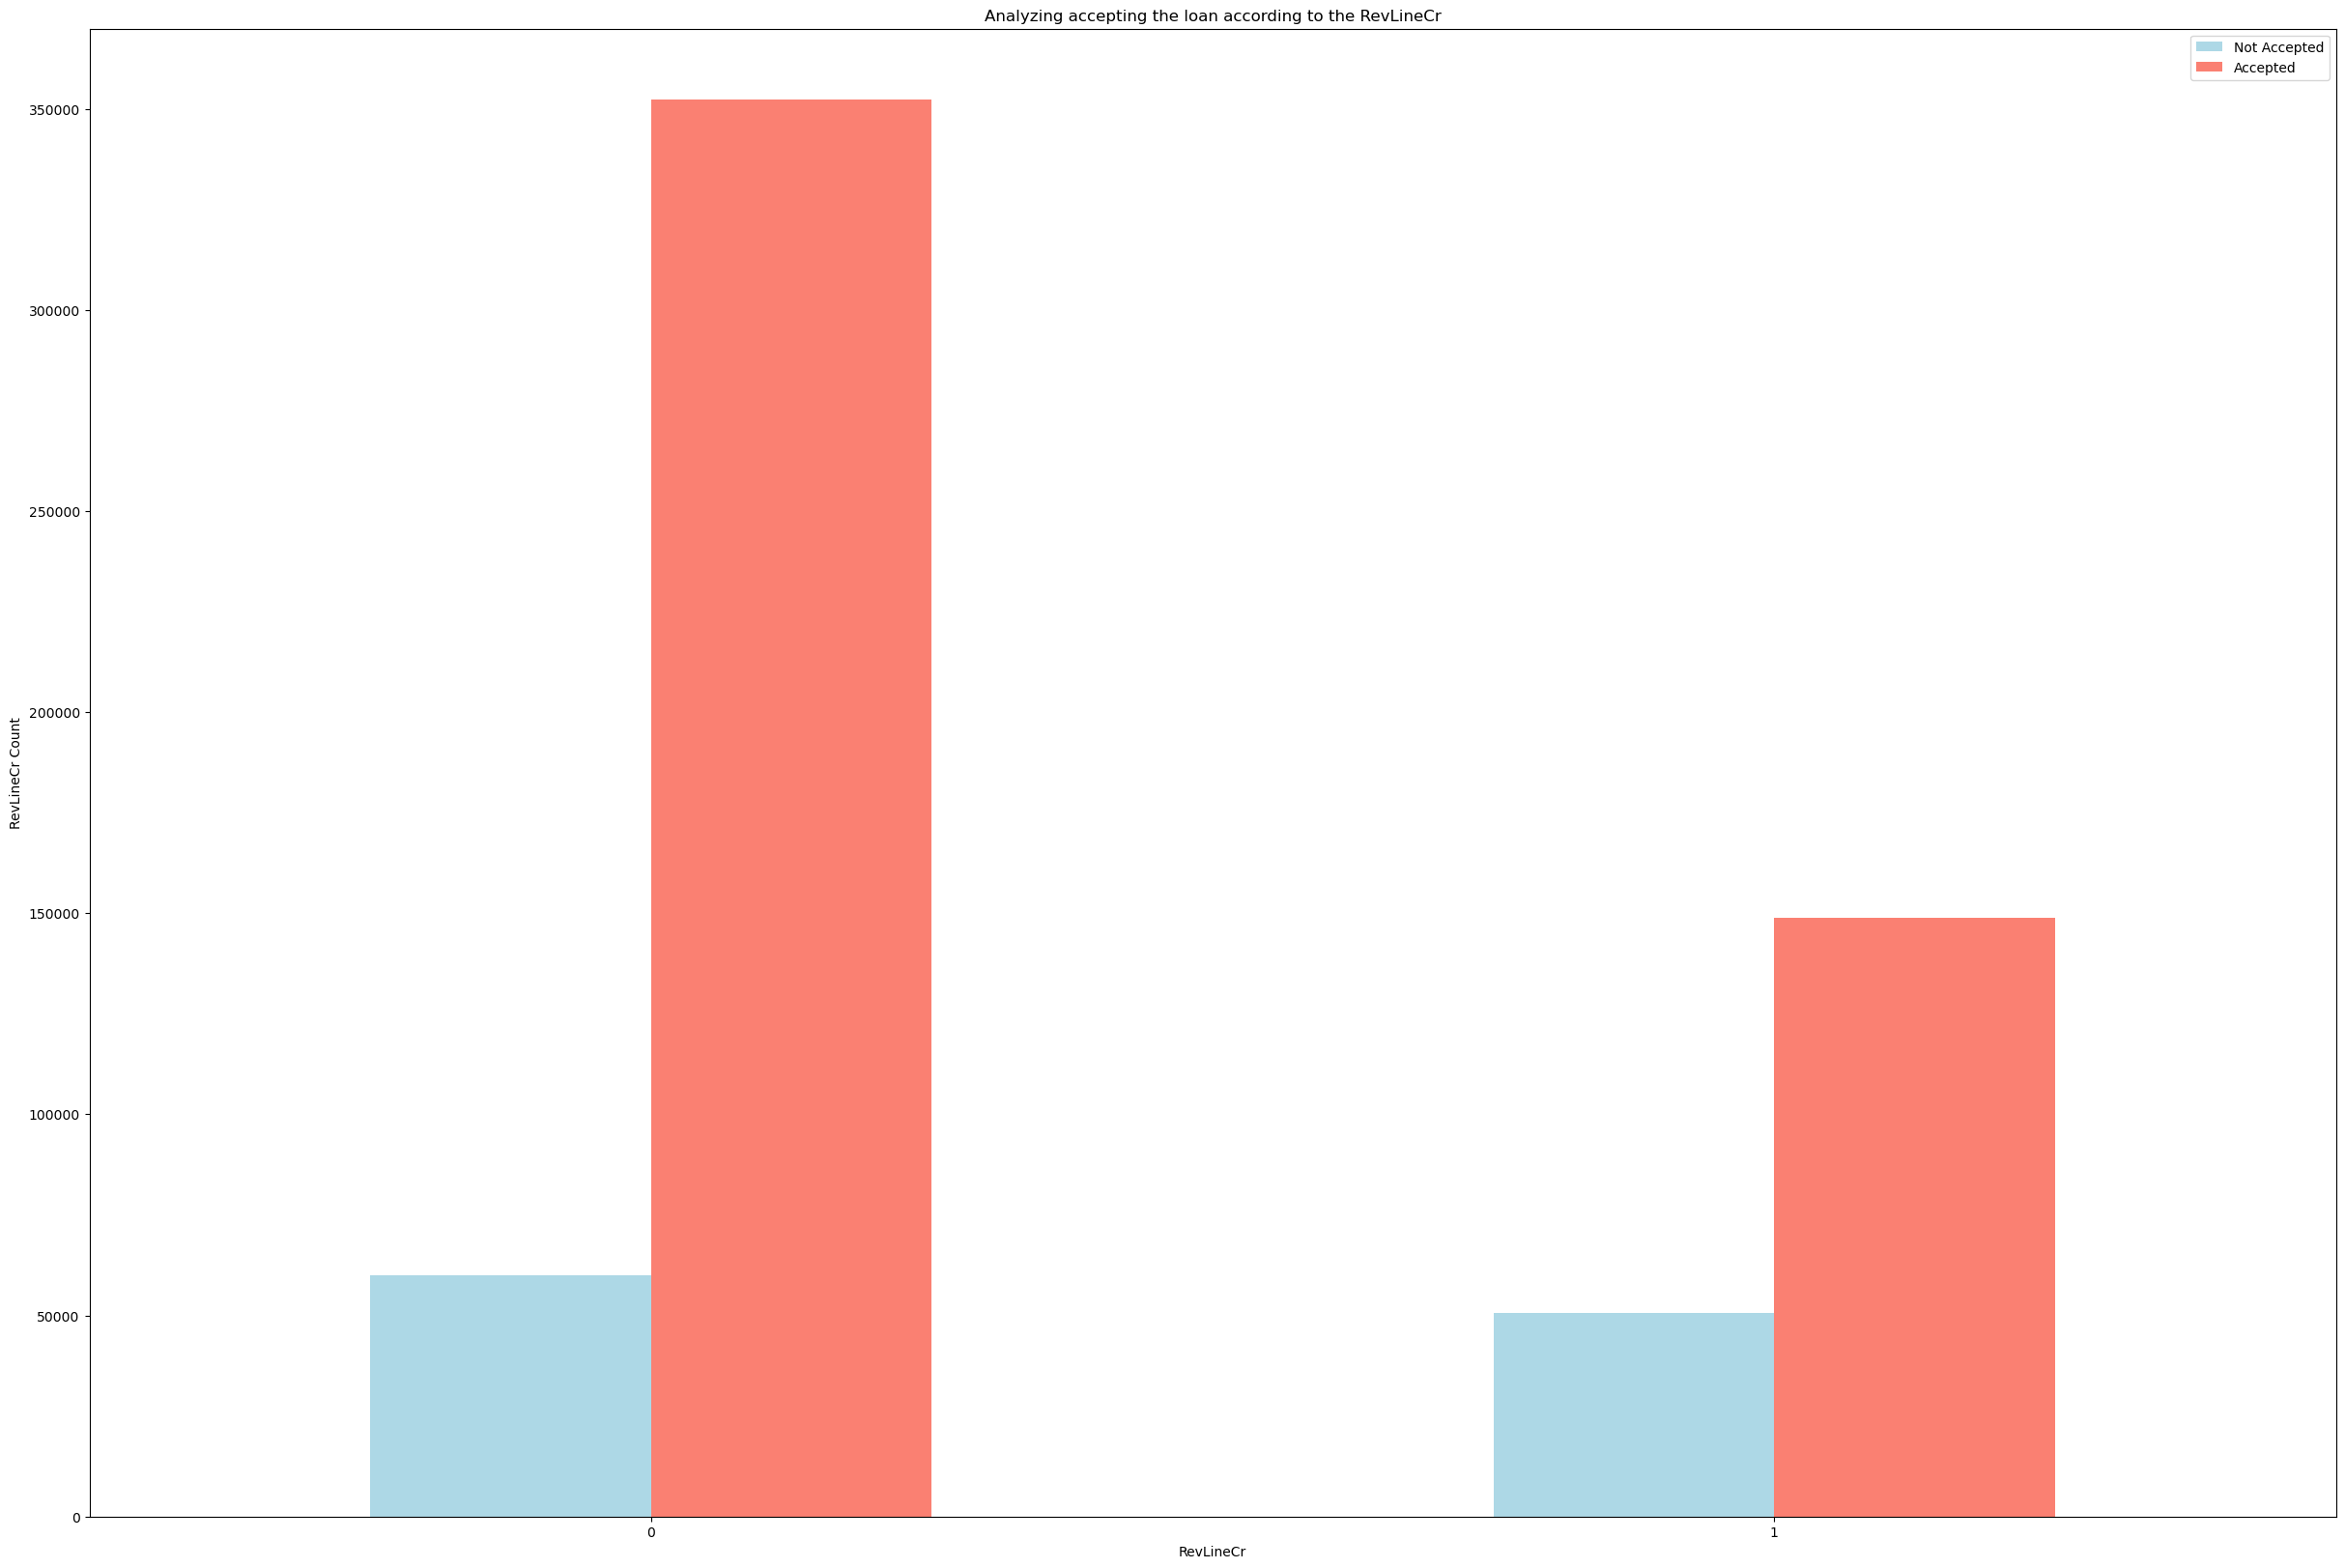

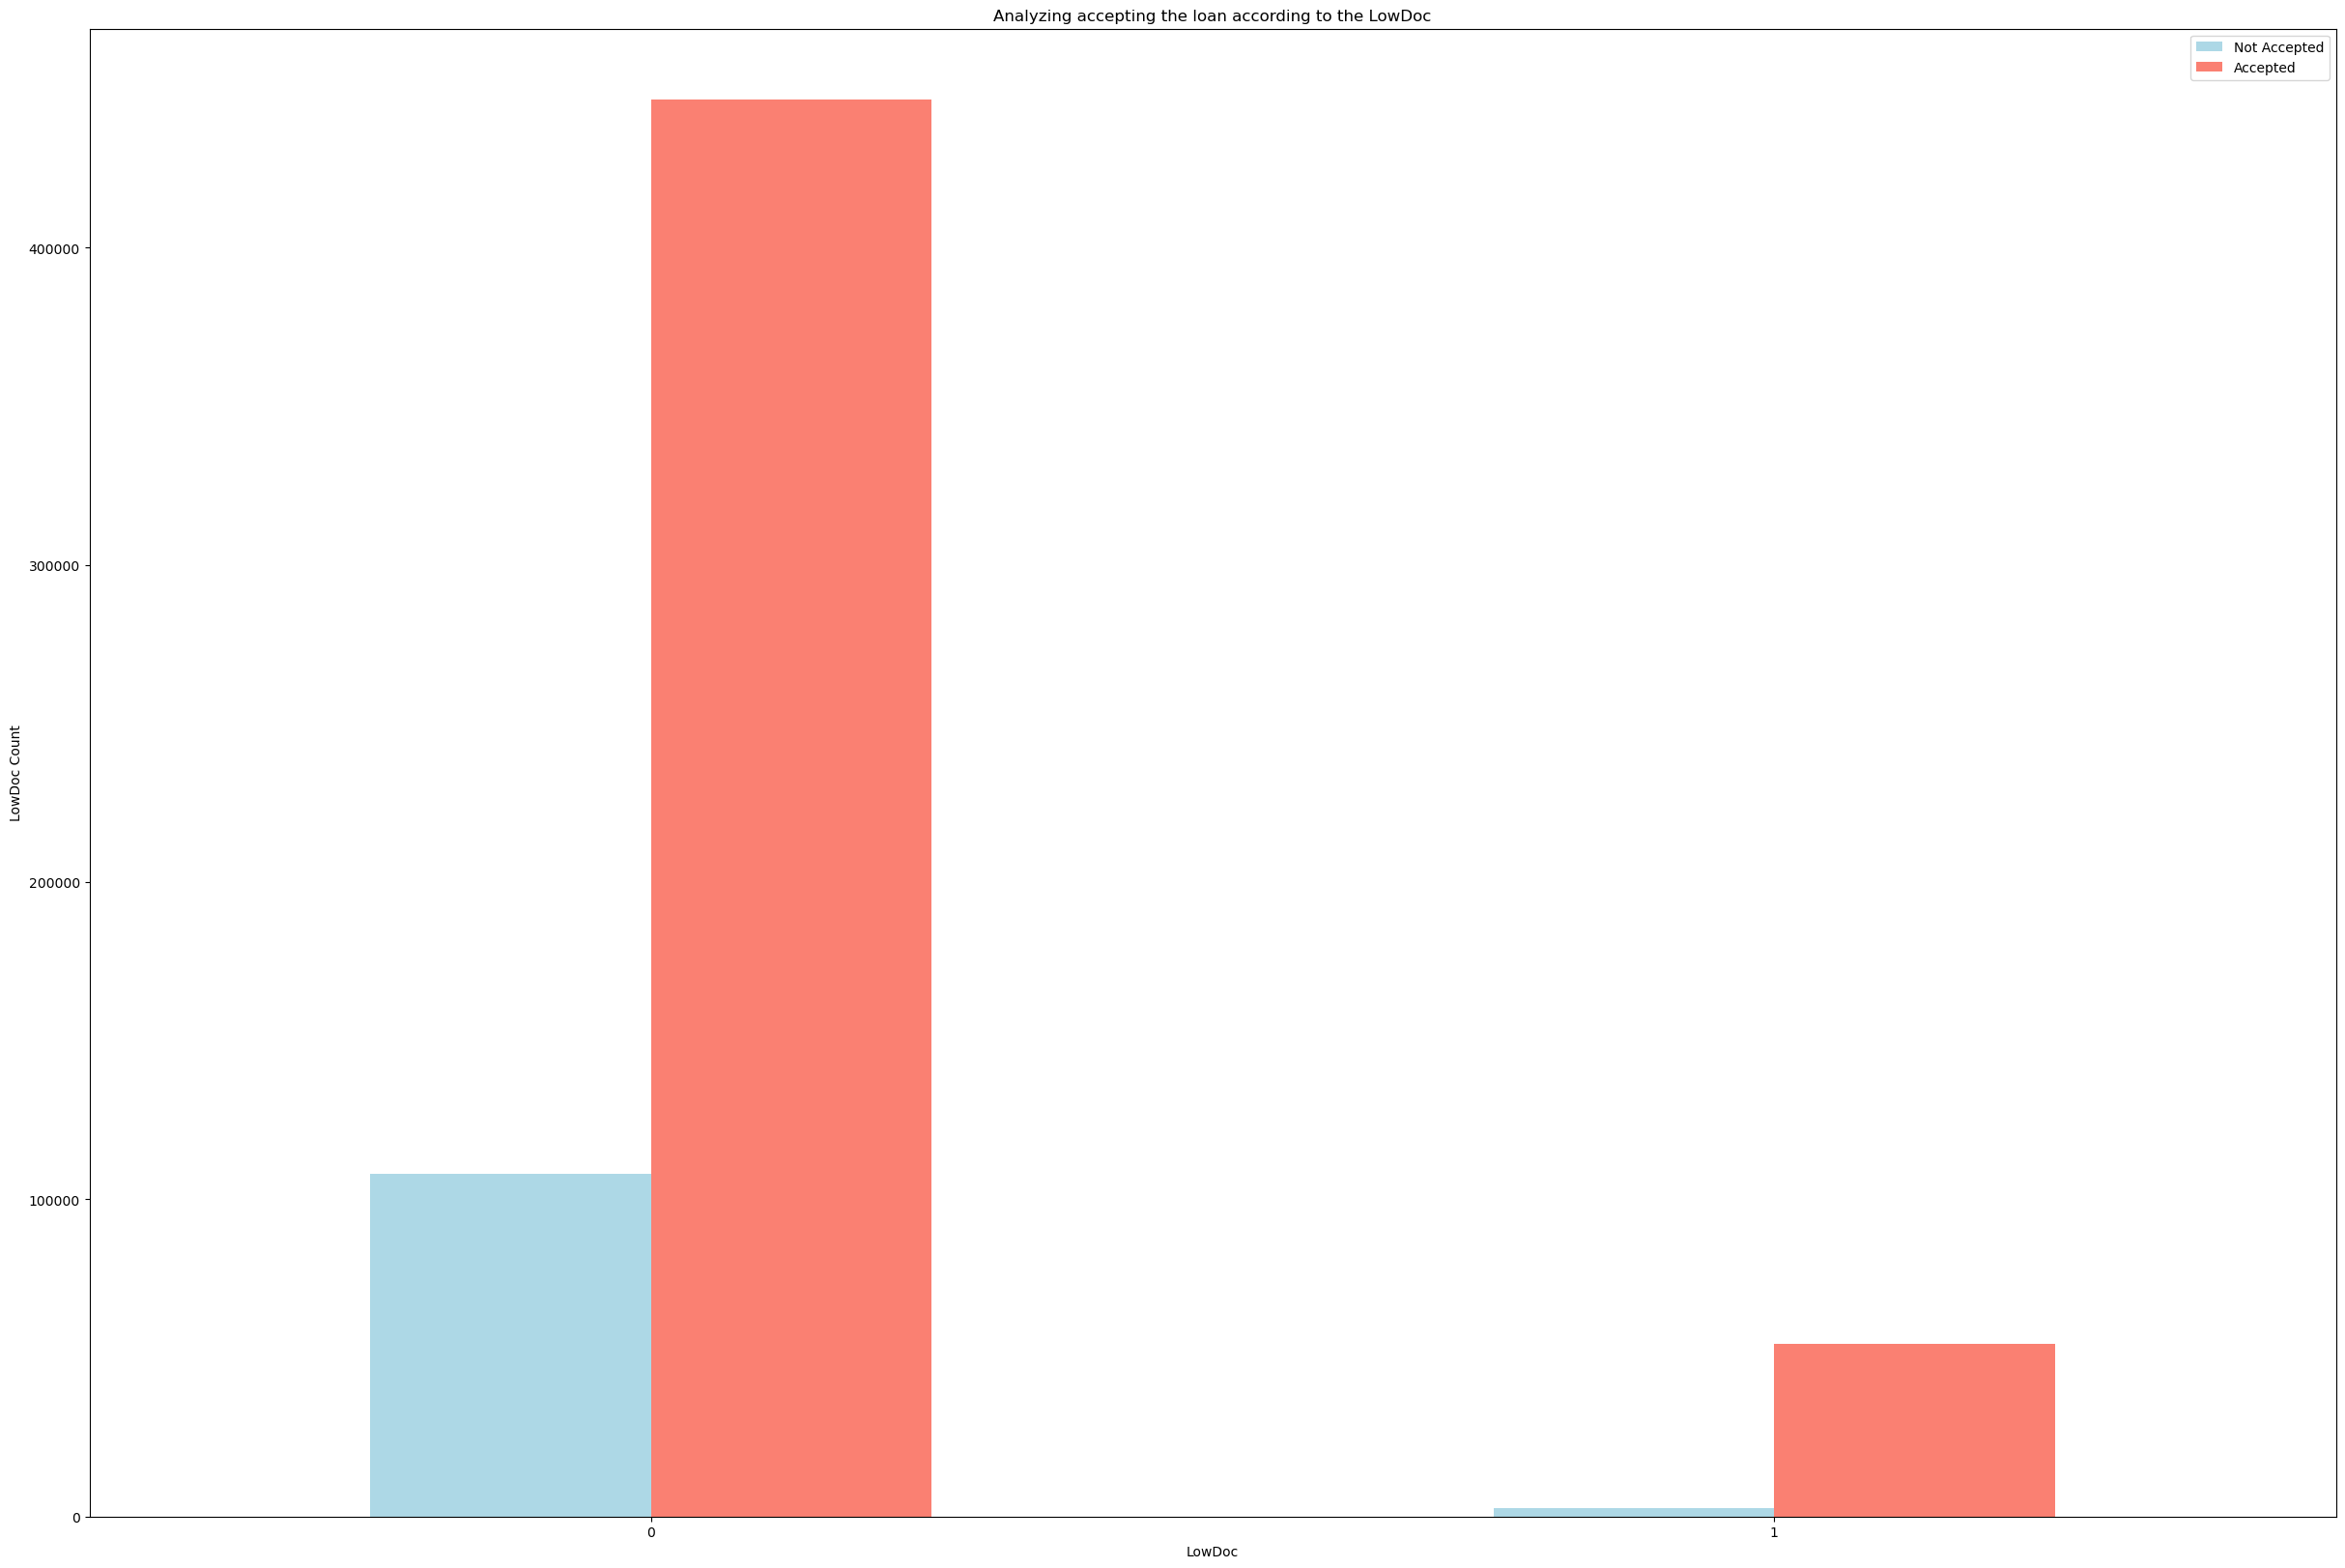

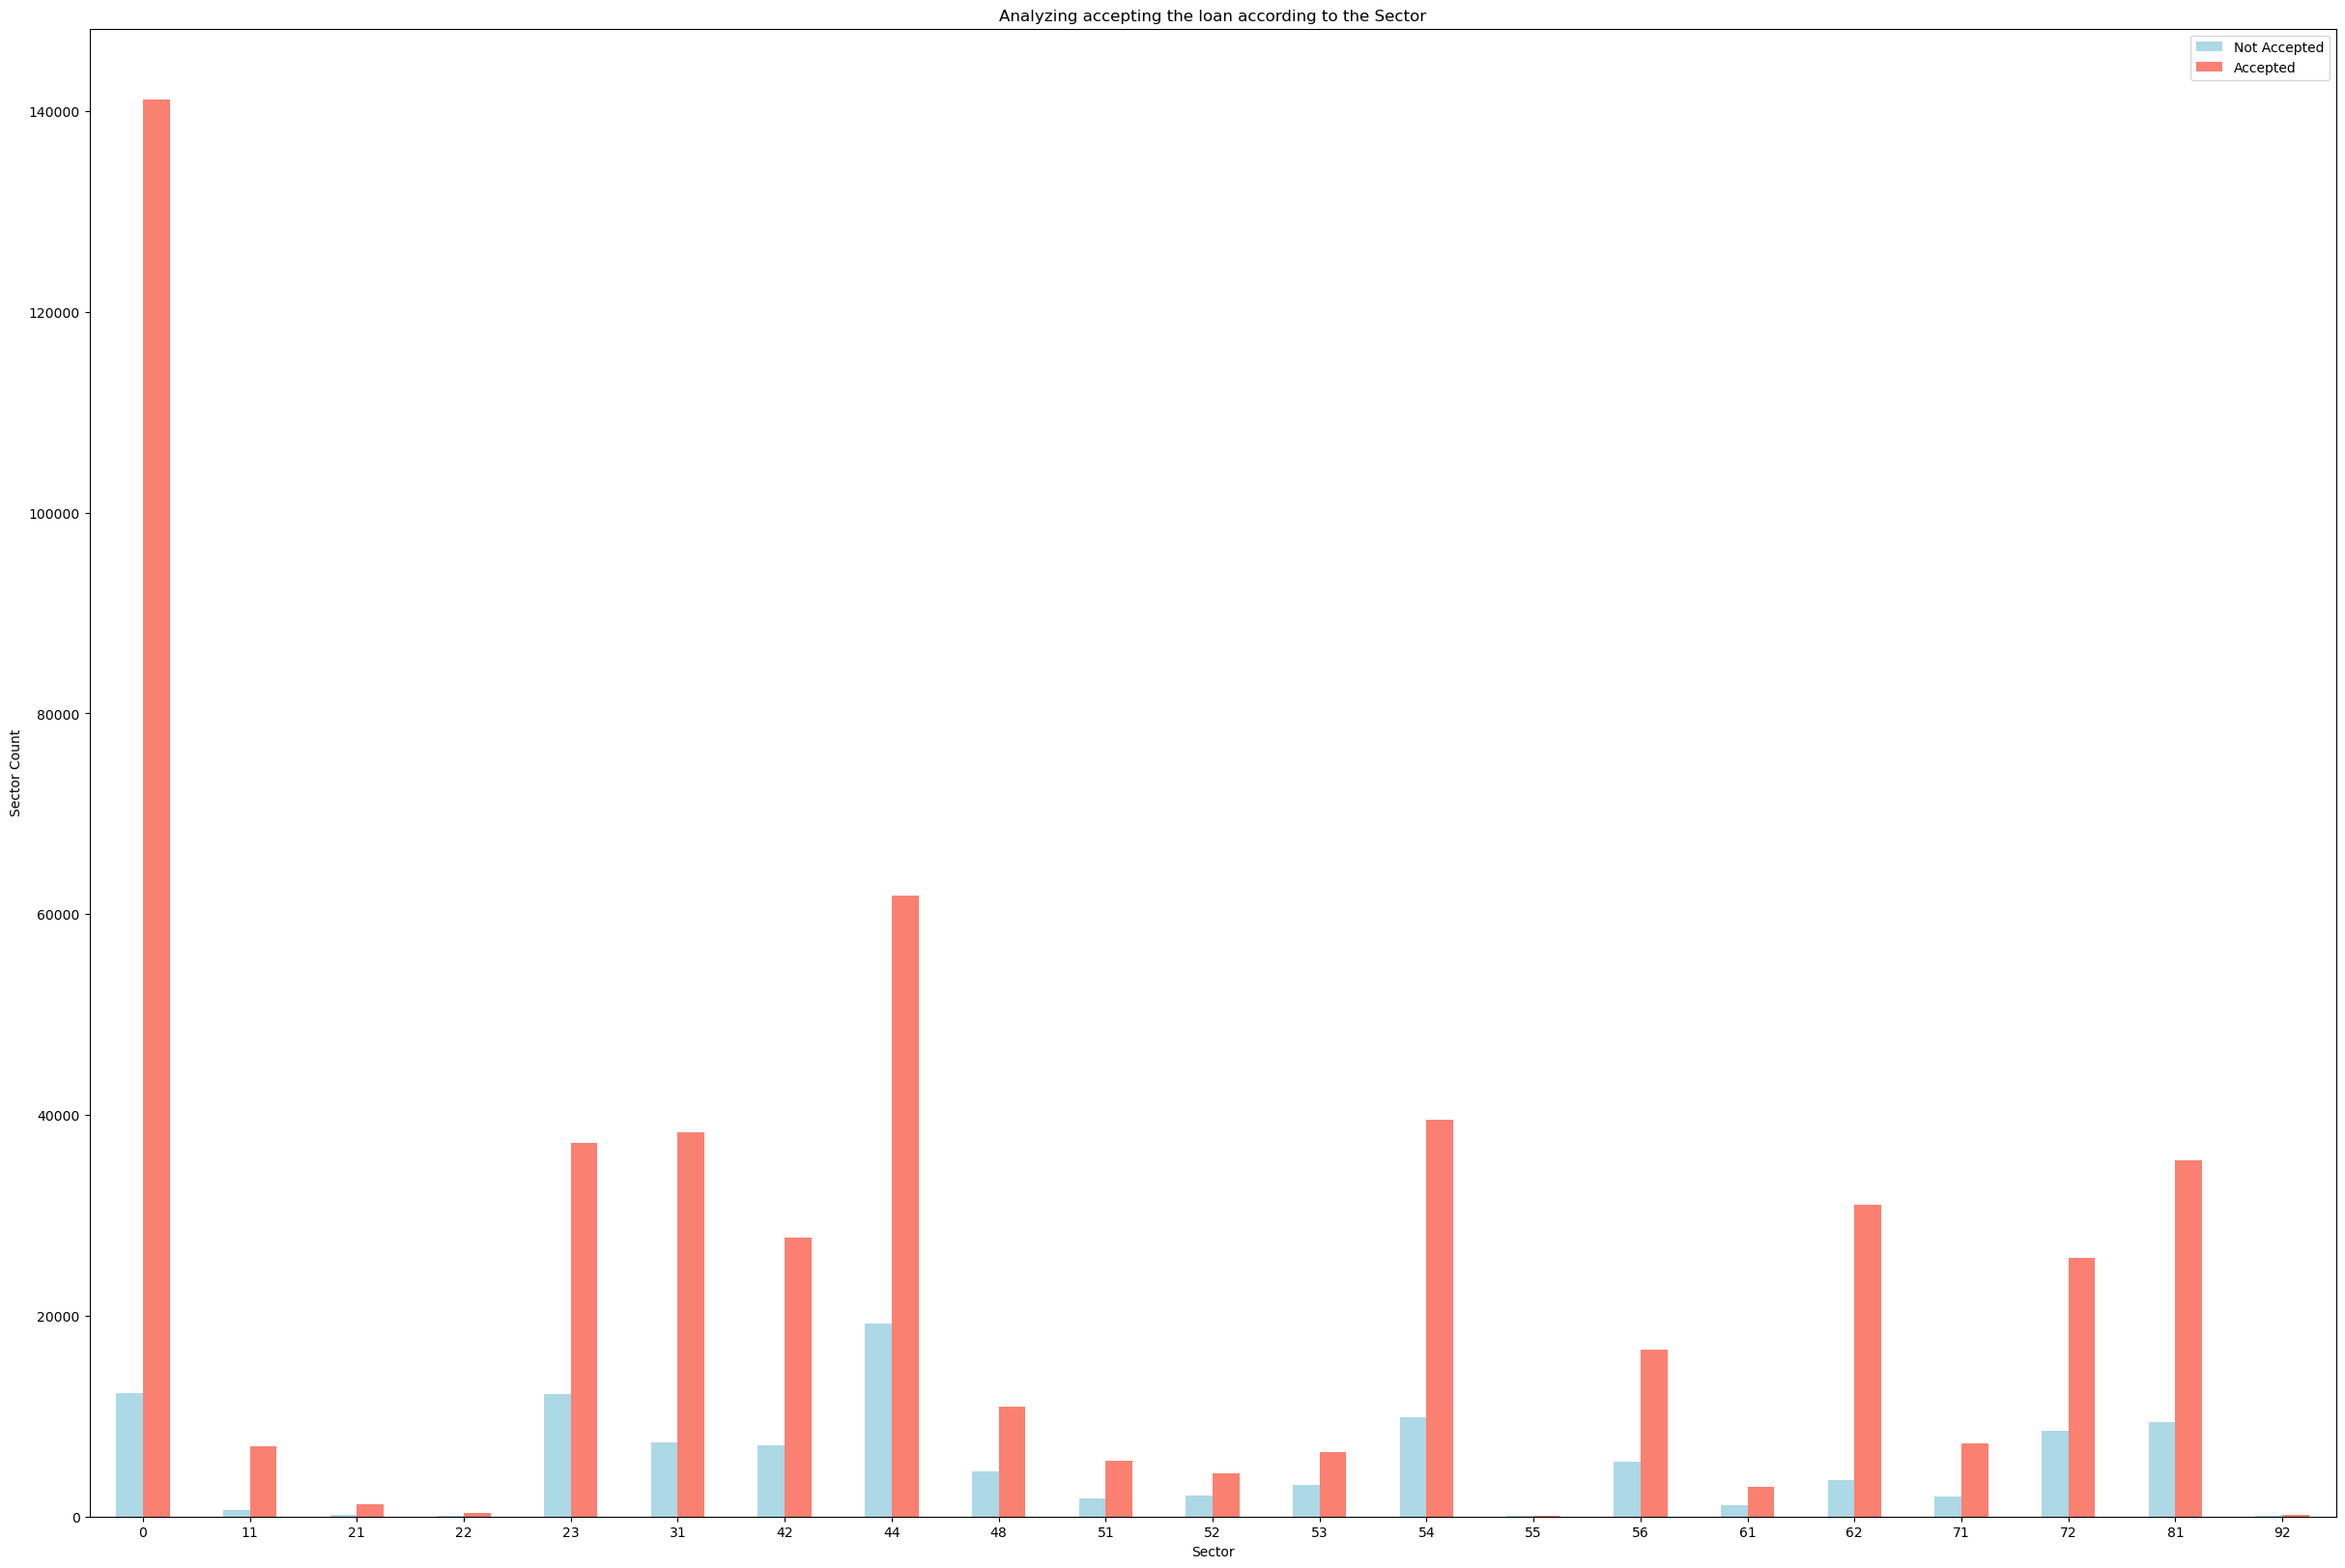

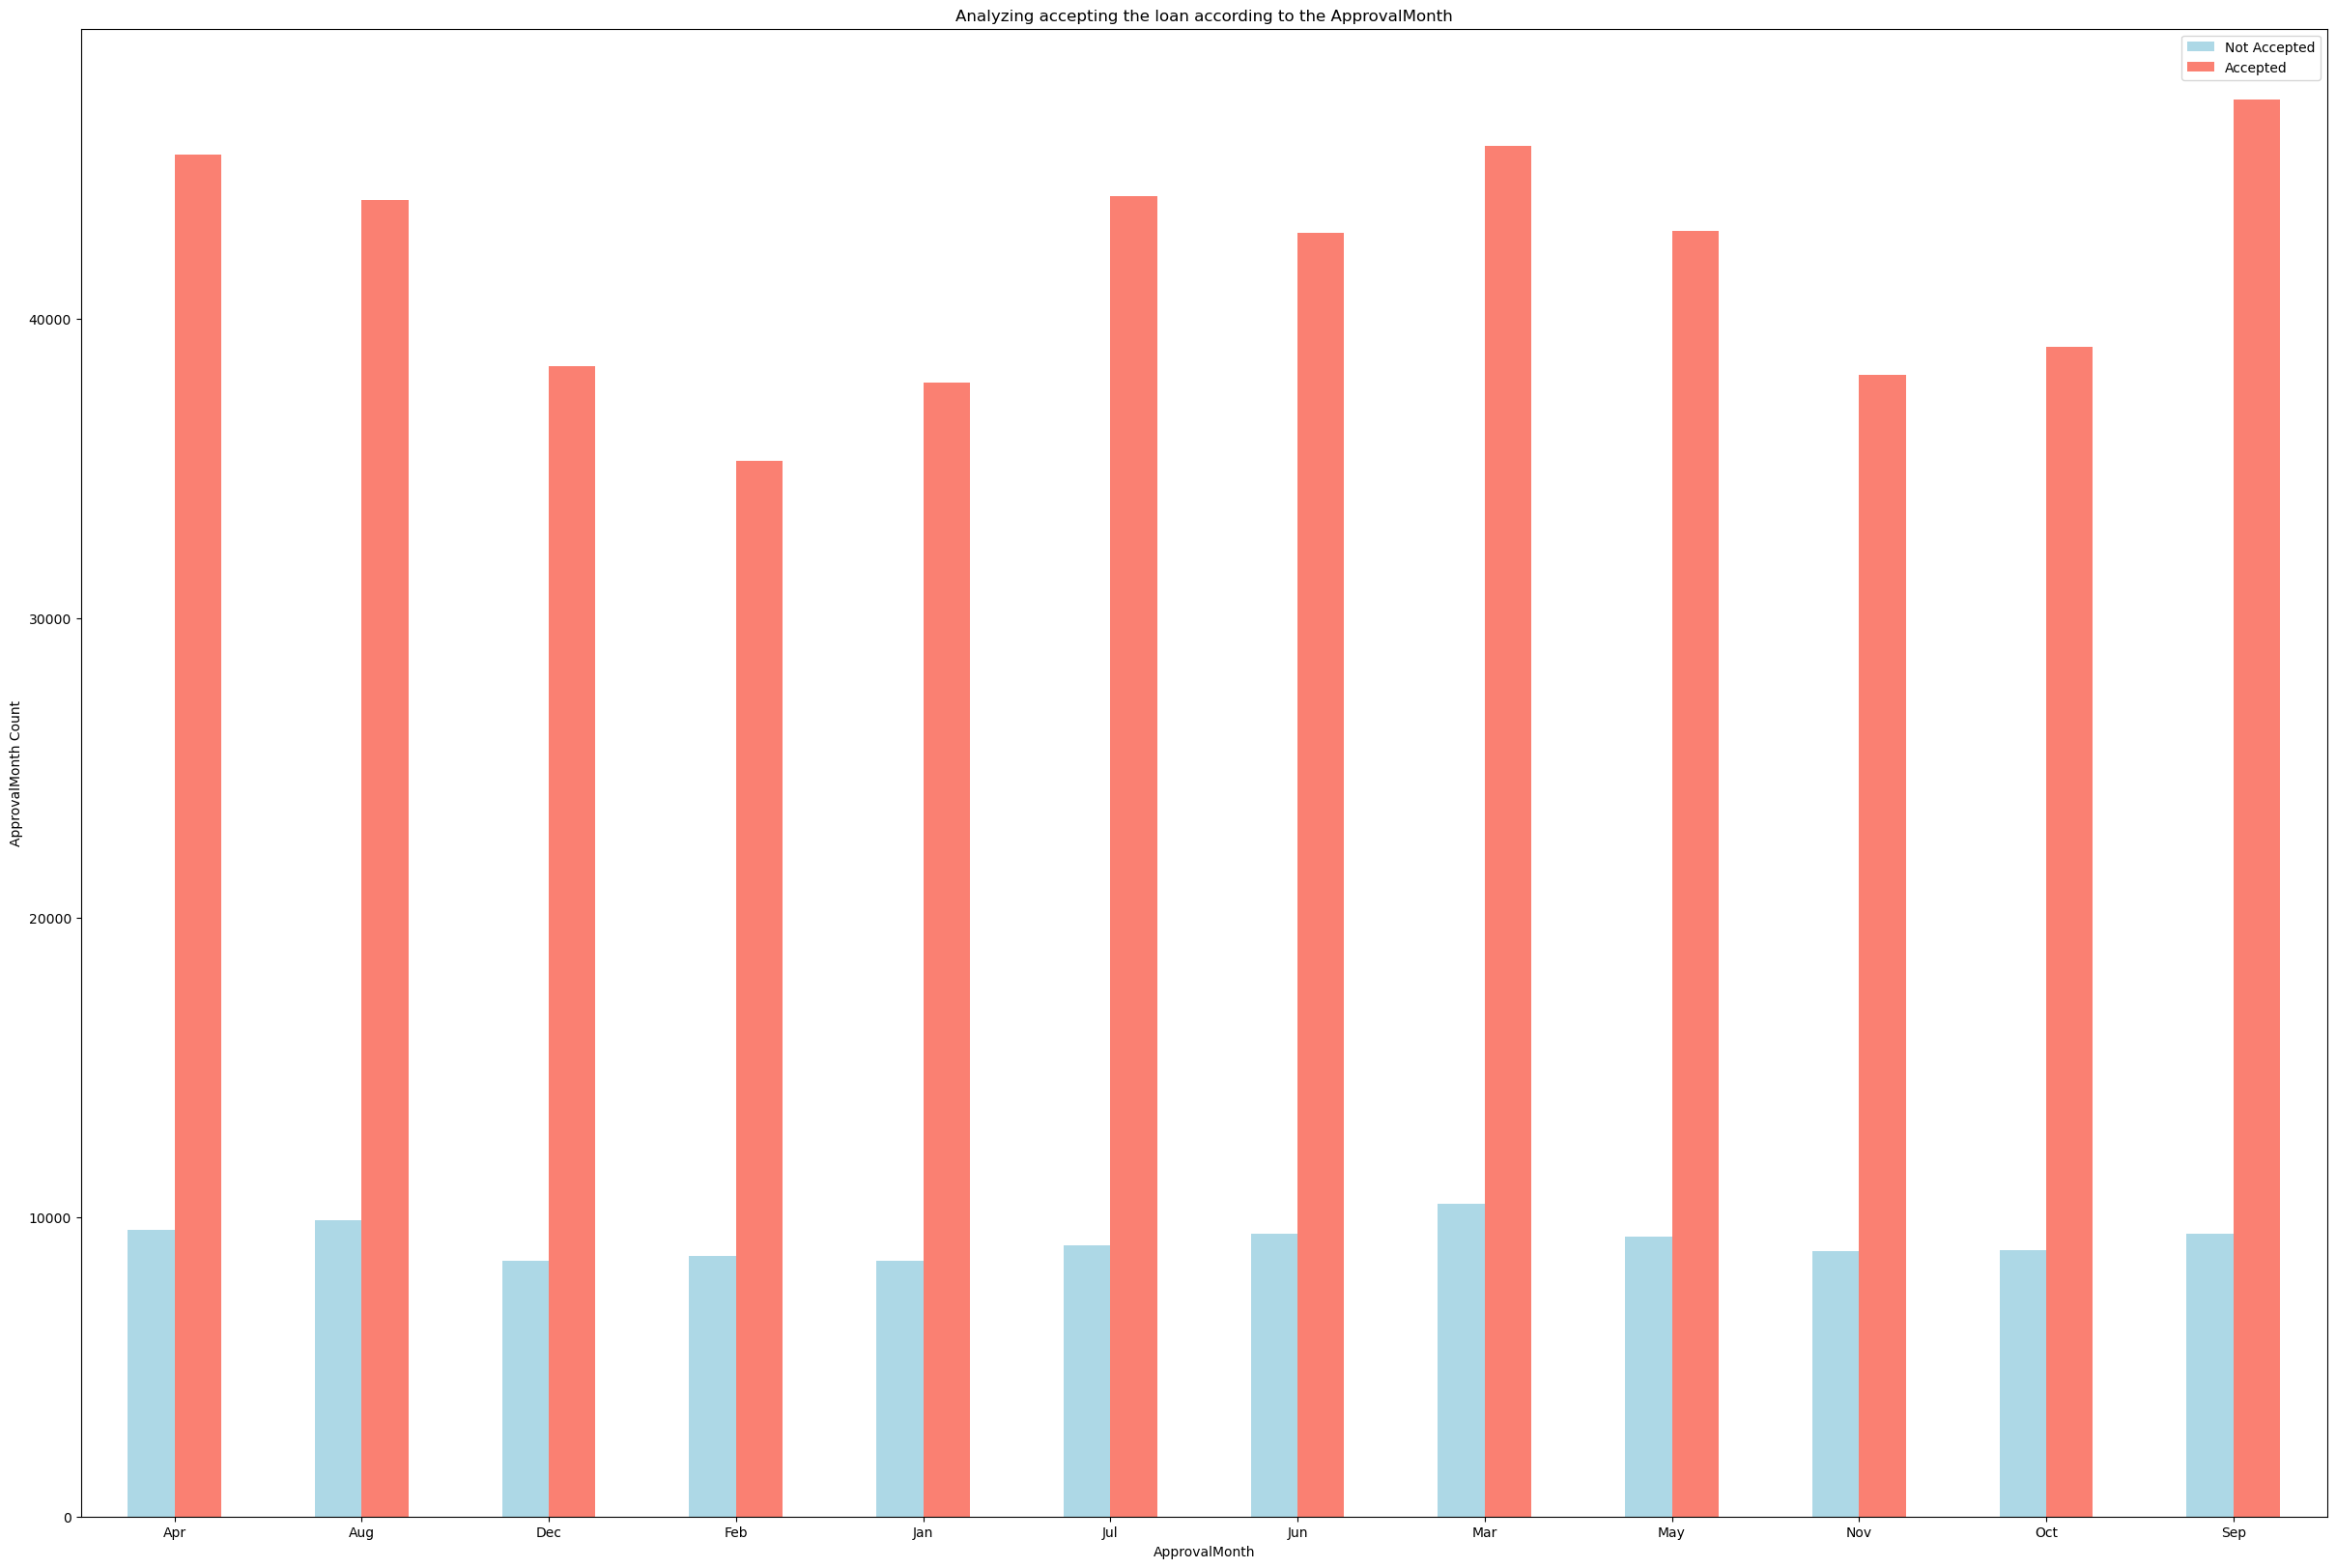

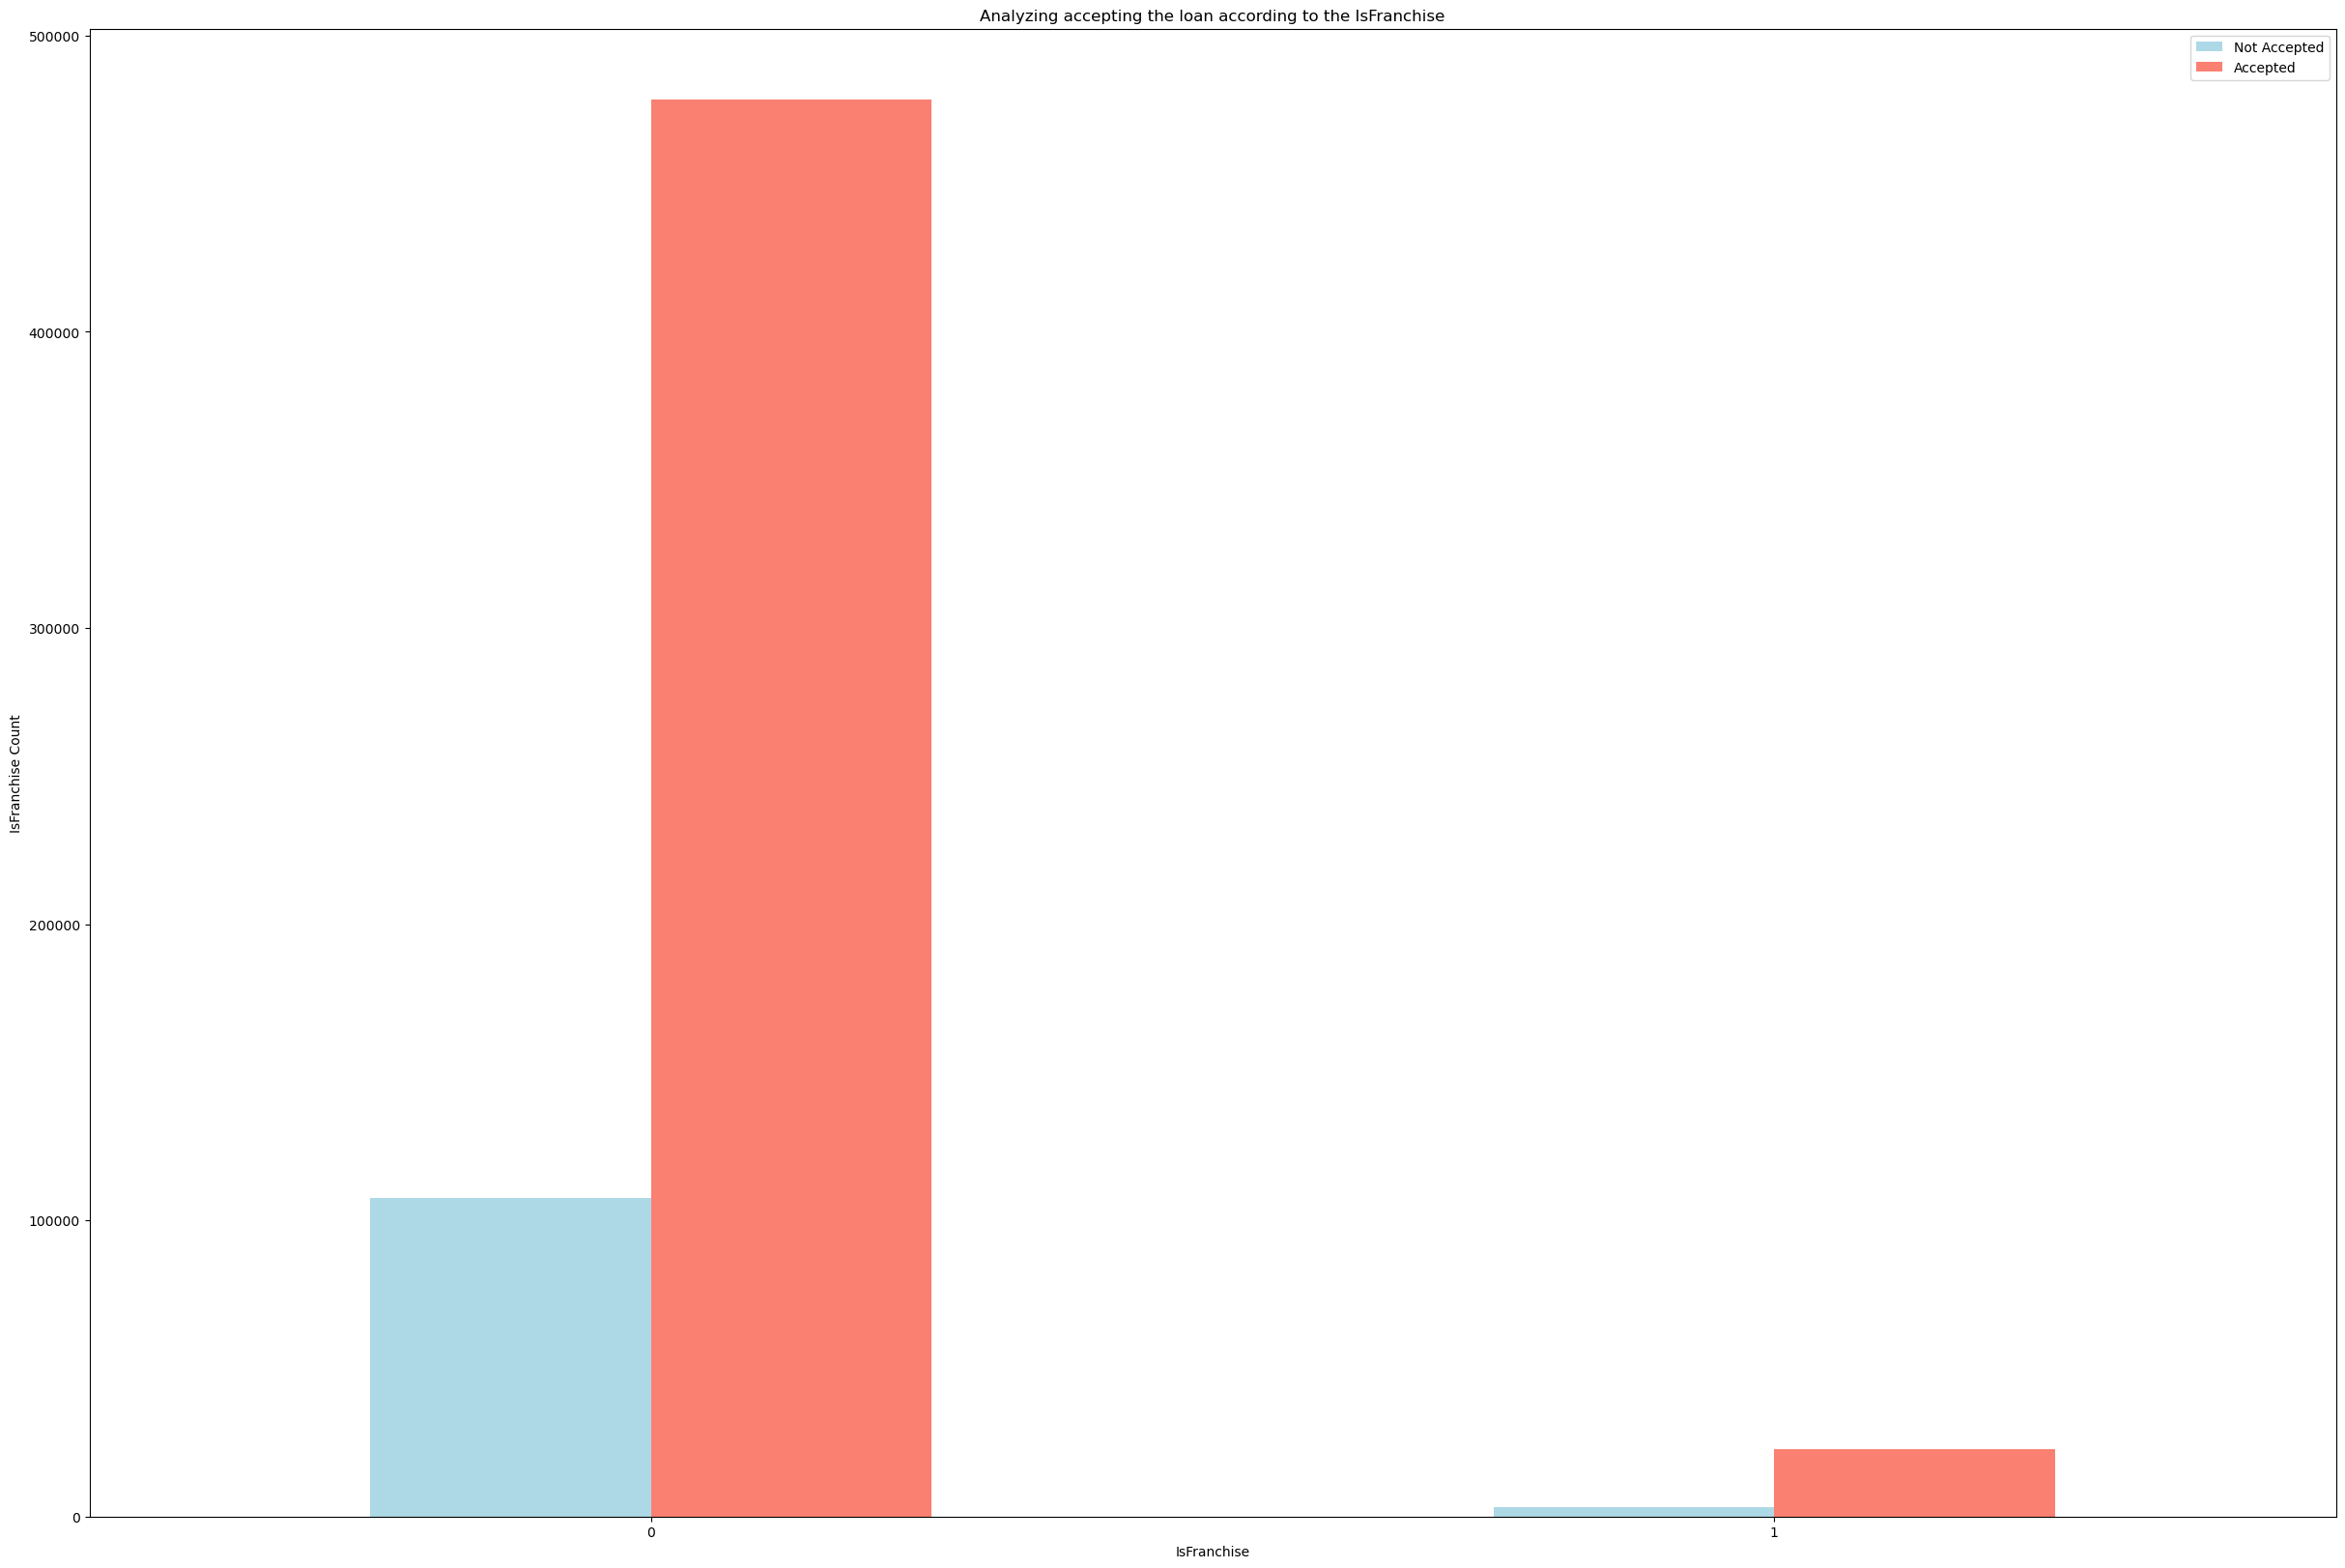

In [11]:
for i,col in enumerate(to_print_features):
    # the effect of the loan Sector on the acceptance of the loan
    pd.crosstab(X[col], y).plot(kind="bar", figsize=(30,20), color=["lightblue", "salmon"])
    plt.title(f"Analyzing accepting the loan according to the {col}")
    plt.xlabel(col)
    plt.ylabel(f"{col} Count")
    plt.legend(["Not Accepted", "Accepted"])
    plt.xticks(rotation=0)
    # save the plot
    plt.savefig(f'../images/EDA/{col}_acceptance.png', dpi=300, bbox_inches='tight')
    plt.show()

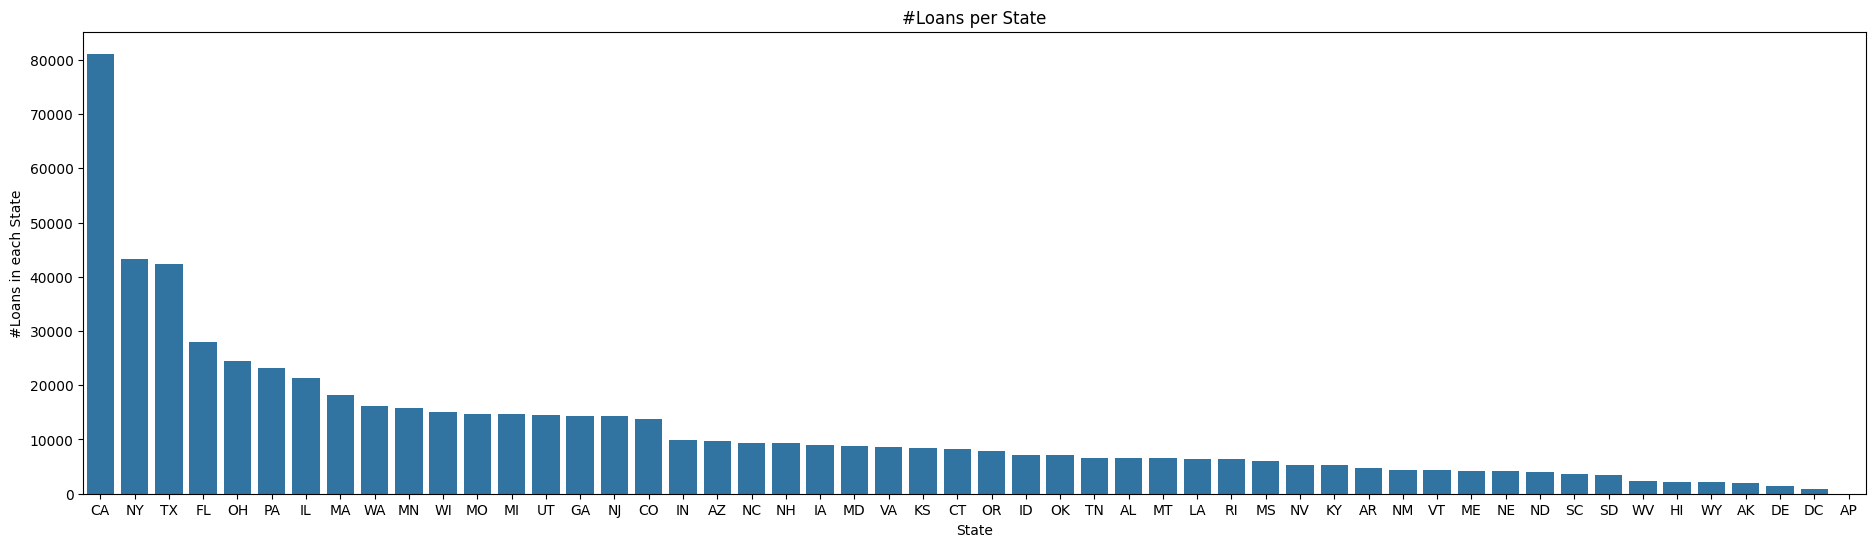

In [22]:
plt.figure(figsize=(23,6))
sns.barplot(x=df['State'].value_counts().index, y=df['State'].value_counts())
plt.title("#Loans per State")
plt.ylabel("#Loans in each State")
# save the plot
plt.savefig(f'../images/EDA/loans_per_state.png', dpi=300, bbox_inches='tight')
plt.show()


**Comment:** it's noticed that the vast majority of loans originate from California.

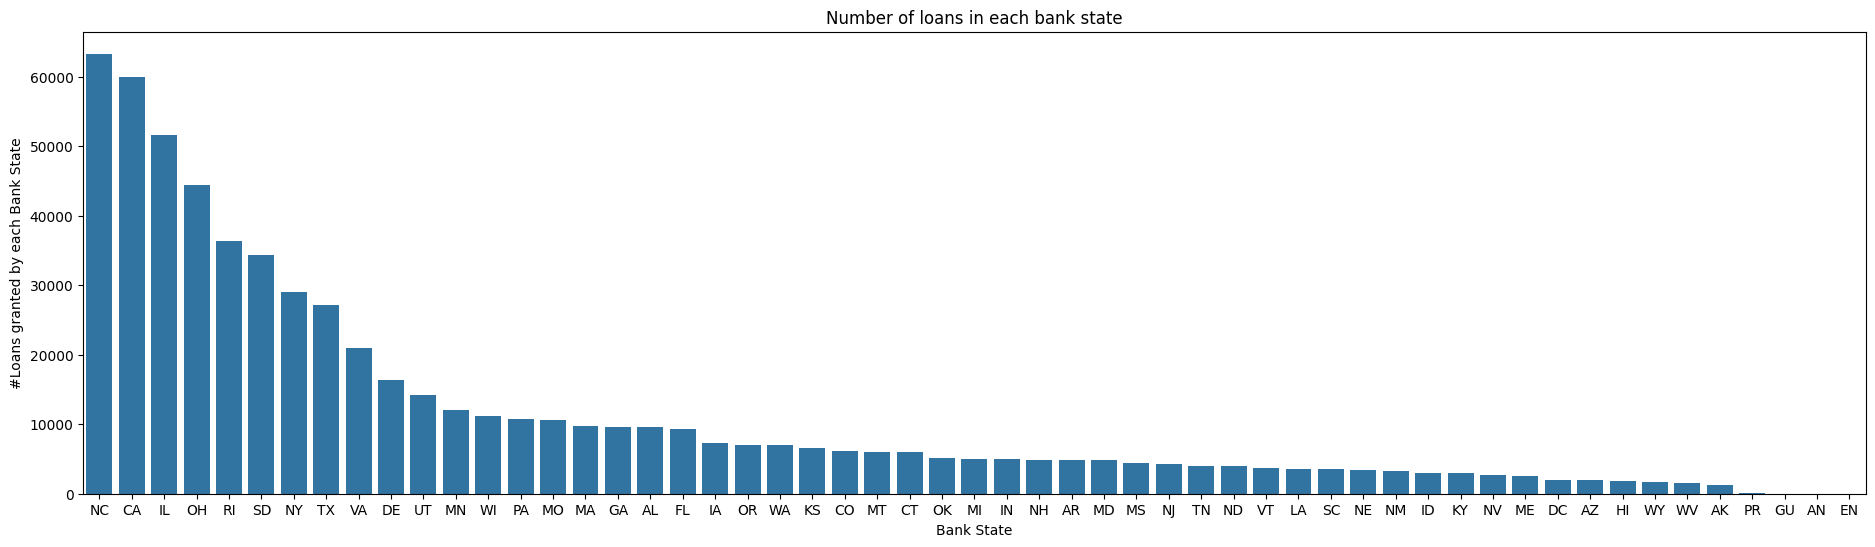

In [23]:
plt.figure(figsize=(23,6))
sns.barplot(x=df['BankState'].value_counts().index, y=df['BankState'].value_counts())
plt.title("Number of loans in each bank state")
plt.xlabel("Bank State")
plt.ylabel("#Loans granted by each Bank State")
plt.savefig(f'../images/EDA/loans_per_bank_state.png', dpi=300, bbox_inches='tight')
plt.show()

**Comments:** It seems there are many instances where loans are granted by banks to small businesses based in other states. For example, the majority of loans are granted by banks based in North Carolina, however North Carolina is not among the top 15 states from which loans originate. In another words, there are other banks give loans to states other than their own state.

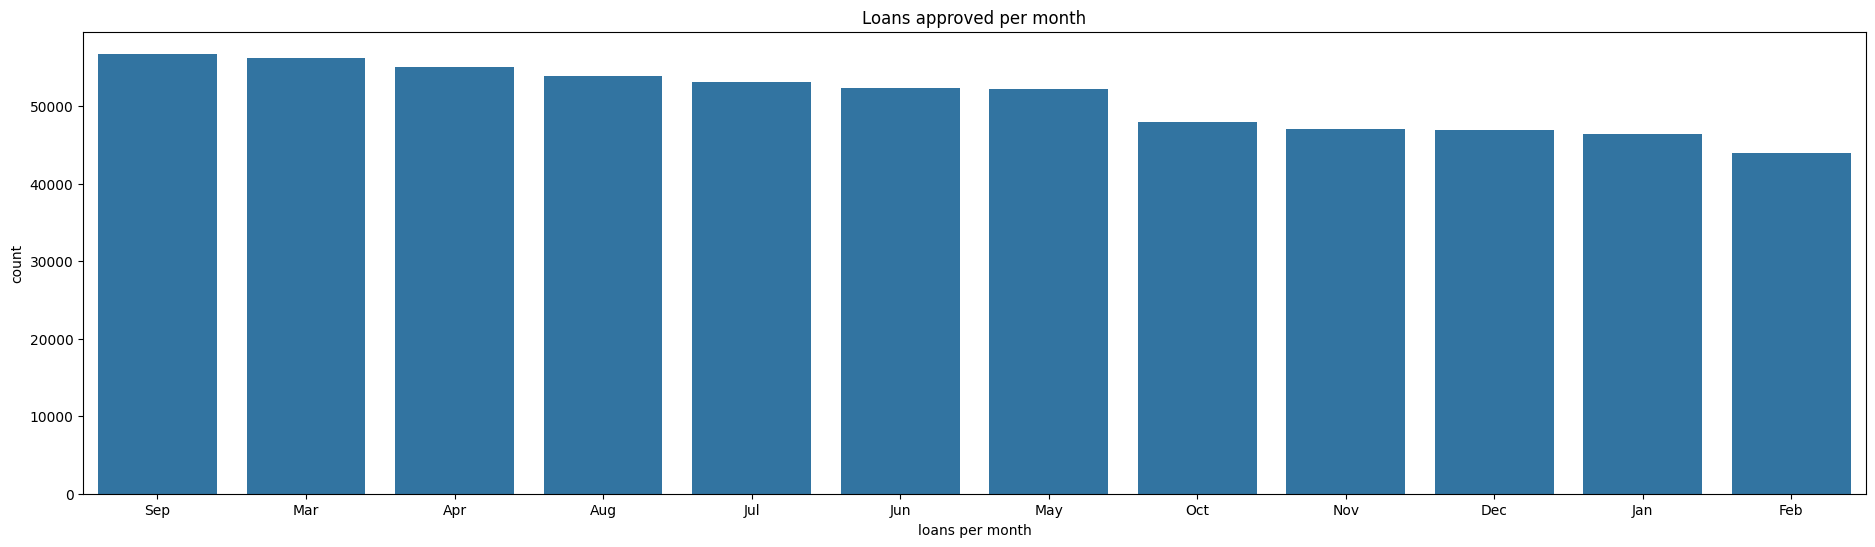

In [24]:
plt.figure(figsize=(23,6))
ax = sns.barplot(x=df['ApprovalMonth'].value_counts().index, y=df['ApprovalMonth'].value_counts())

# Set plot title and labels
plt.title("Loans approved per month")
plt.xlabel("loans per month")

plt.savefig(f'../images/EDA/loans_per_month.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


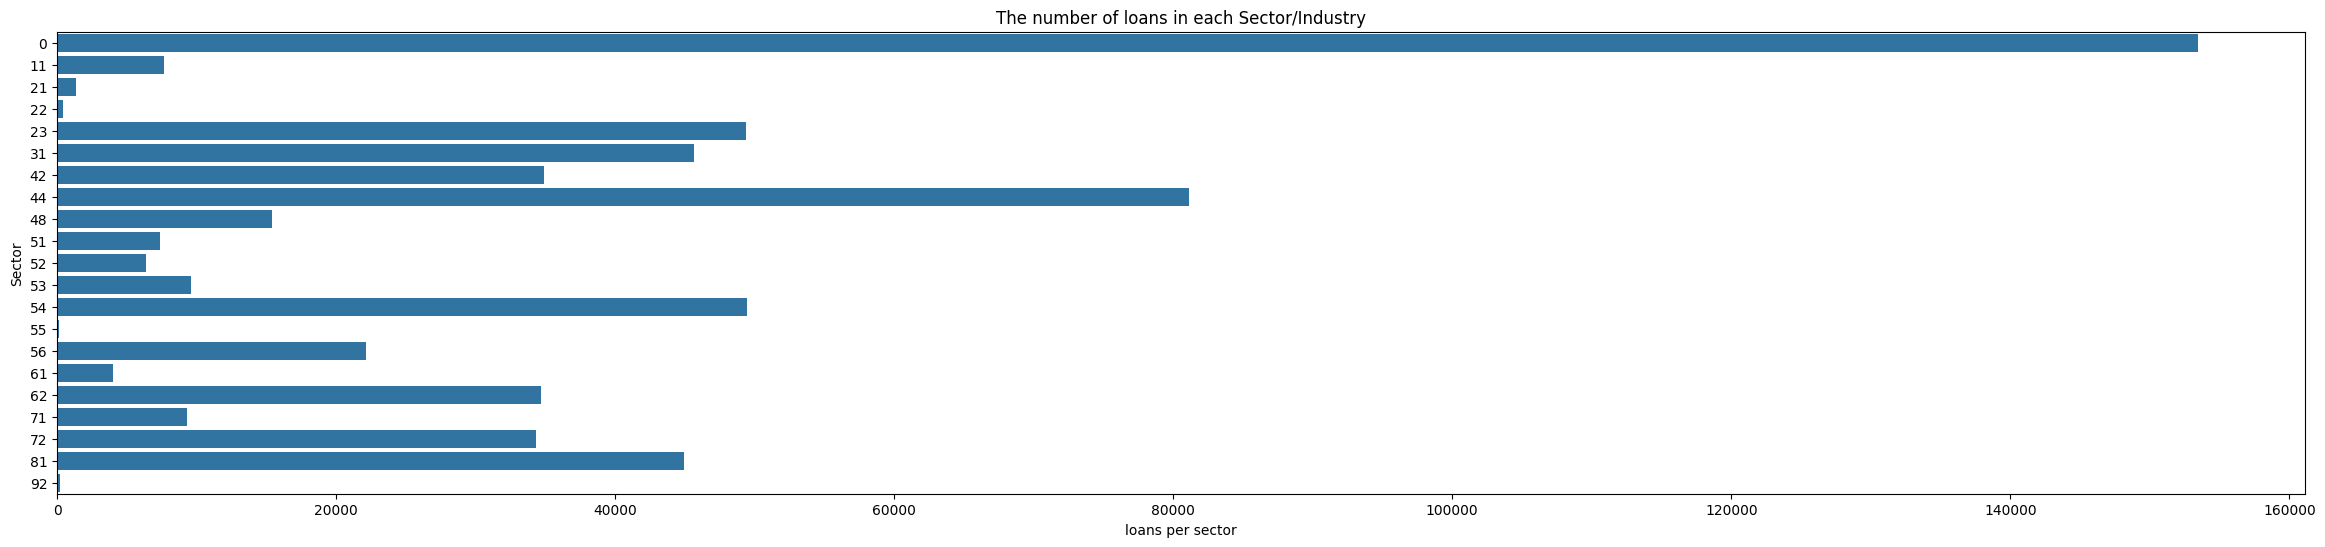

In [25]:
plt.figure(figsize=(29,6))
sns.barplot(x=df['Sector'].value_counts(), y=df['Sector'].value_counts().index, orient='h')
plt.title("The number of loans in each Sector/Industry")
plt.xlabel("loans per sector")
plt.savefig(f'../images/EDA/loans_per_sector.png', dpi=300, bbox_inches='tight')
plt.show()

numerical_cols ['Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'RevLineCr', 'LowDoc', 'IsFranchise', 'clean_DisbursementGross', 'clean_ChgOffPrinGr', 'clean_GrAppv', 'clean_SBA_Appv']


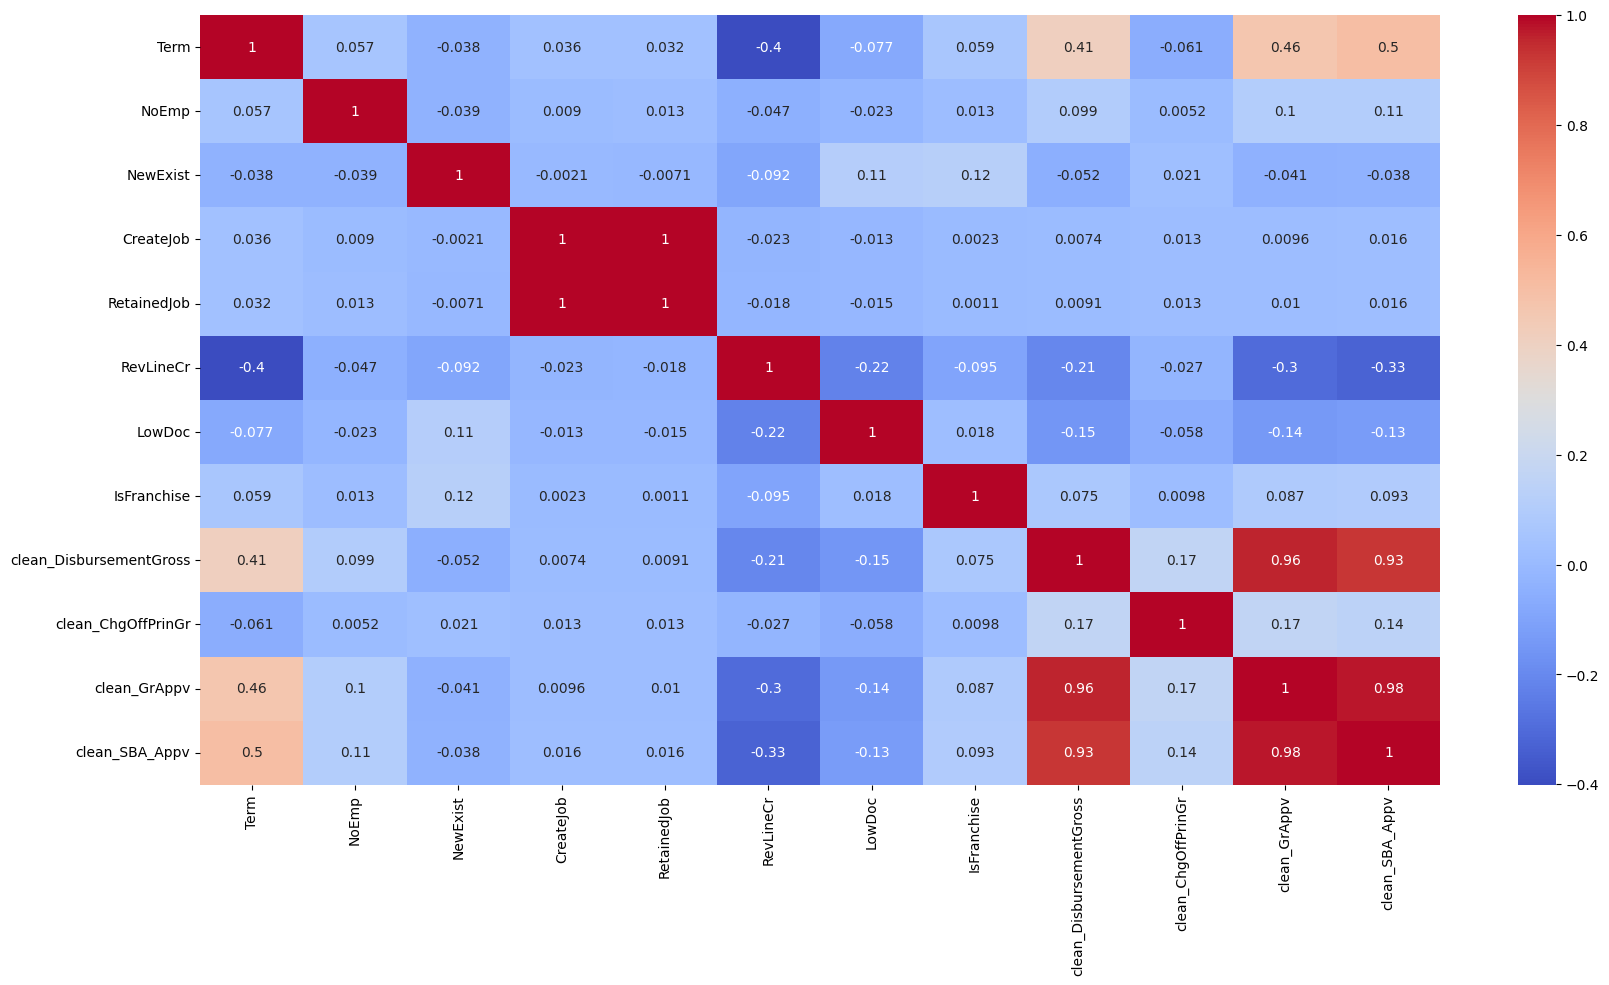

In [26]:

# correlation matrix
cols = df.columns
categorical_columns = ["Name","State", "Bank", "BankState", "UrbanRural", "Sector", "ApprovalMonth","Zip","City","MIS_Status"]

numerical_cols = [cols[i] for i in range(len(cols)) if cols[i] not in categorical_columns]
print("numerical_cols",numerical_cols)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df[numerical_cols].corr(), annot = True, cmap = "coolwarm")
plt.savefig(f'../images/EDA/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### Detecting outliers in numerical columns

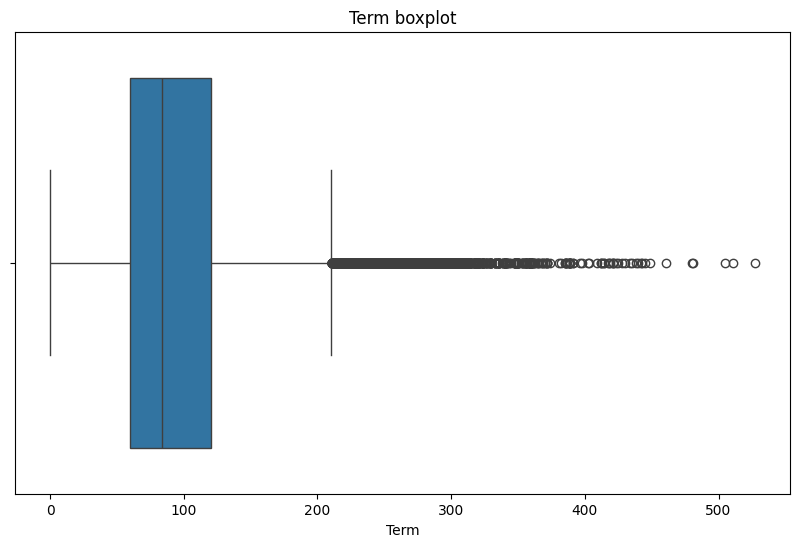

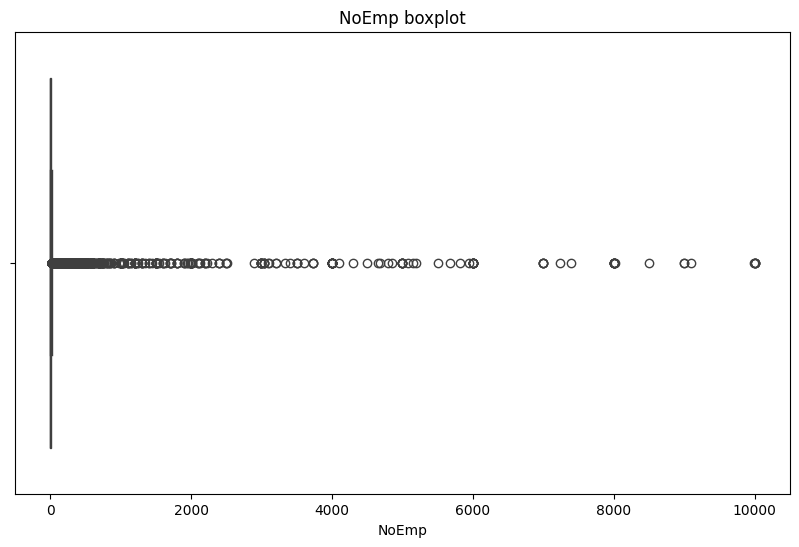

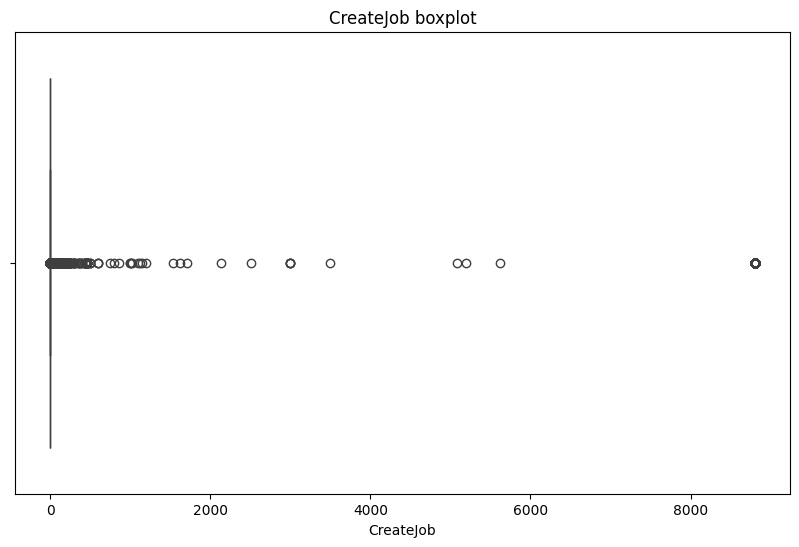

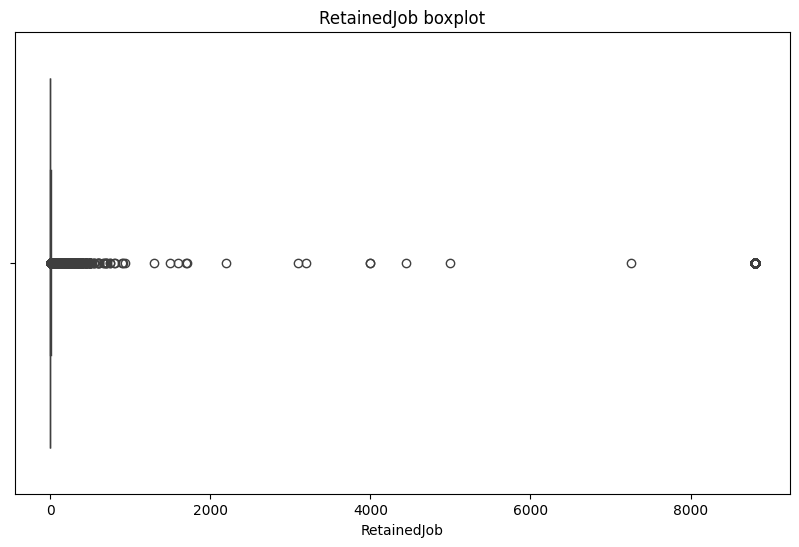

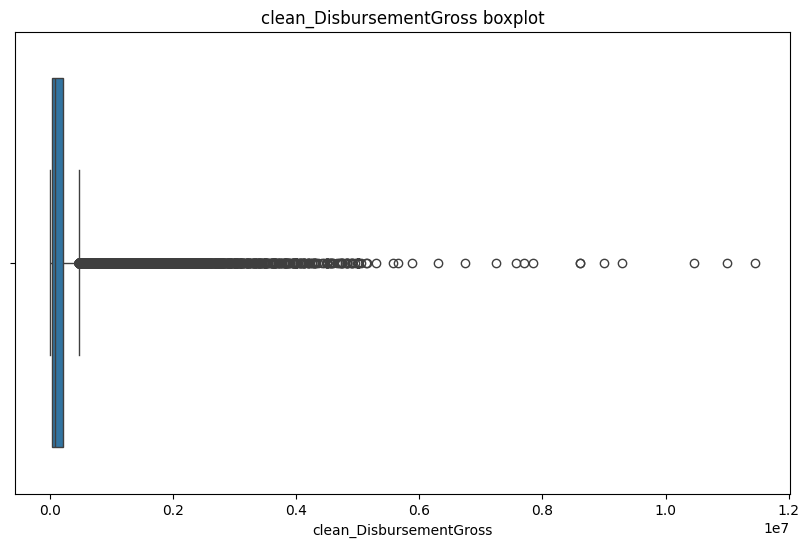

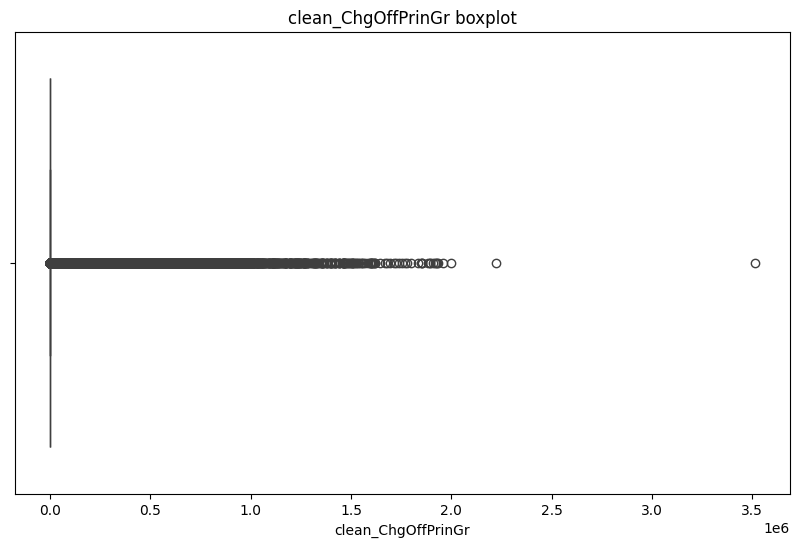

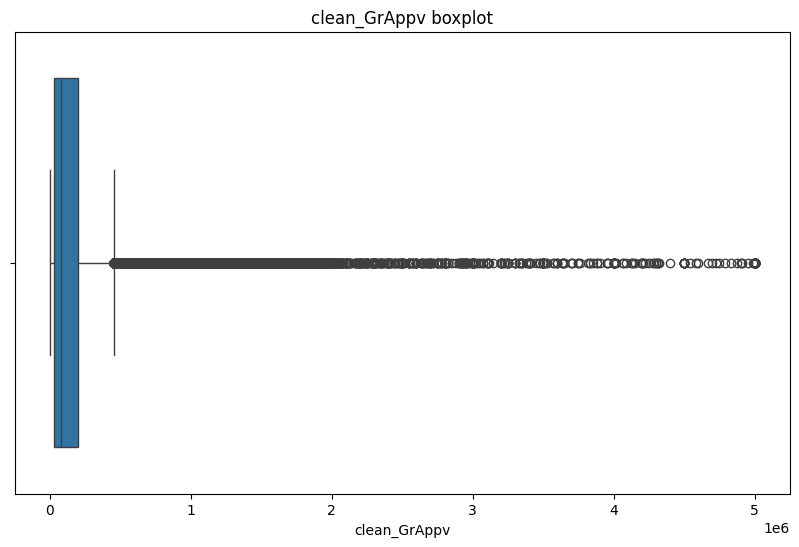

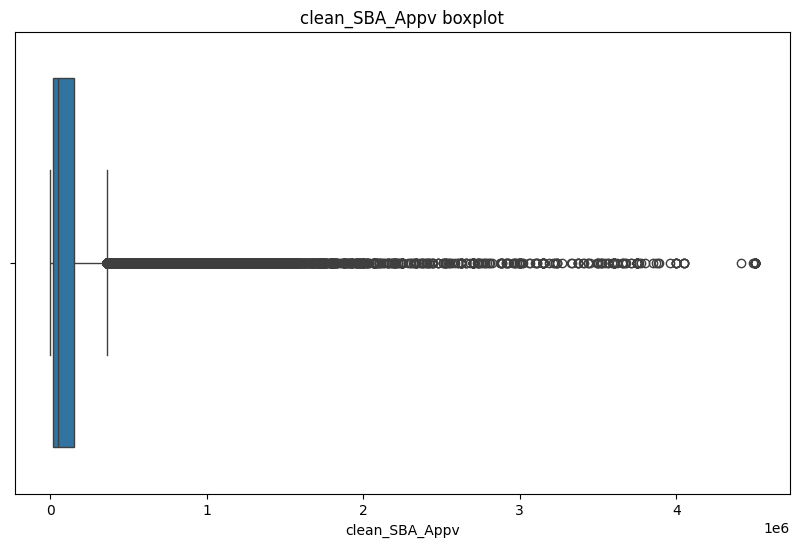

In [34]:
# draw boxplots to visualize outliers
for i in numerical_cols:
    if len(df[i].unique())>2:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[i])
        plt.title(f"{i} boxplot")
        plt.savefig(f'../images/EDA/{i}_boxplot.png', dpi=300, bbox_inches='tight')
        plt.show()